# Dear valued visitor,
# Welcome to the analytical lab of Solus Prime. In this lab, we hope to showcase our efforts in helping Optimus Prime to achieve their goals of ***reducing carbon emissions*** in a ***financially sound manner.***

# 1. Calculation of Optimus Prime's Baseline

---



In [ ]:
# Pip install libraries
!pip install dash
!pip install plotly

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import dash
from dash import dcc, html
import plotly.graph_objs as go


# Mounting of Google Drive
# Before running, make sure that your pathways are correct
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1(a) Find the total carbon emission per vehicle per year (2020 and 2021):

In [ ]:
# Load the Fleet Log to see what kind of data it contains
fleet_log_path = '/content/drive/My Drive/Solus Prime Accenture Case/Data Provided/Fleet Log.xlsx'
fleet_log = pd.read_excel(fleet_log_path)
fleet_log #this is a dataframe

,Category,Fuel Type,Fuel Amount2020 ($P),Liter2020,Travel Distance2020,Fuel Amount2021 ($P),Liter2021,Travel Distance2021
0,Panel Van,Petrol,7705721.41,4.240481e+06,58688777,6915289.55,3.331226e+06,40950091
1,3-tonne Truck,Diesel,4918997.72,2.682355e+06,15231565,5491541.56,2.417332e+06,14269241
2,Motorcycle,Petrol,2376368.05,1.412794e+06,150247136,2476584.38,1.225057e+06,97880208
3,Pick-up truck,Petrol,1158406.66,6.417273e+05,10745275,1112410.33,5.388451e+05,15175448
4,Window Van,Petrol,187237.23,1.036989e+05,1124843,223046.59,1.044651e+05,2274372
5,7-seater Van,Petrol,111603.56,6.633594e+04,752088,137990.50,6.688940e+04,664861
6,Patrol Vans,Petrol,81669.50,4.385491e+04,488666,113332.11,5.389842e+04,834534
7,8-tonne Truck,Diesel,31818.20,1.675080e+04,83839,6428.92,3.154654e+03,20733
8,TOTAL,NaN,16571822.33,9.207998e+06,237362189,16476623.94,7.740868e+06,172069488


In [ ]:
# Create new dataframe for Yr2020 + Additional column for the carbon emission per vehicle type
columns_2020 = ['Category','Fuel Type','Fuel Amount2020 ($P)','Liter2020','Travel Distance2020']
carbon_emission_2020 = fleet_log[columns_2020].copy()
# Remove the last row which finds the total for each column
carbon_emission_2020 = carbon_emission_2020.dropna(subset=['Fuel Type'])

carbon_emission_2020 = carbon_emission_2020.head(8)
# Assumed carbon emission per liter of fuel (emission factor)
emission_factors = {
    'Petrol': 2.71,
    'Diesel': 3.07
}

# Calculate total carbon emissions for each vehicle and add it as a new column
carbon_emission_2020['Total CO2 Emissions2020 (kg)'] = carbon_emission_2020.apply(
    lambda row: row['Liter2020'] * emission_factors.get(row['Fuel Type'], 0), # Add default value 0
    axis=1
)

# Create a new column to see the CO2 Emissions(kg) per Disance Travelled
carbon_emission_2020['CO2 Emissions(kg) per Distance Travelled'] = carbon_emission_2020.apply(
    lambda row: row['Total CO2 Emissions2020 (kg)'] / row['Travel Distance2020'],
    axis=1
)

# Sort the DataFrame by the 'Total CO2 Emissions2021 (kg)' column in descending order
carbon_emission_2020_sorted = carbon_emission_2020.sort_values(
    by='CO2 Emissions(kg) per Distance Travelled',
    ascending=False
)

# View the new Dataframe
carbon_emission_2020_sorted

,Category,Fuel Type,Fuel Amount2020 ($P),Liter2020,Travel Distance2020,Total CO2 Emissions2020 (kg),CO2 Emissions(kg) per Distance Travelled
7,8-tonne Truck,Diesel,31818.20,1.675080e+04,83839,5.142494e+04,0.613377
1,3-tonne Truck,Diesel,4918997.72,2.682355e+06,15231565,8.234830e+06,0.540642
4,Window Van,Petrol,187237.23,1.036989e+05,1124843,2.810239e+05,0.249834
6,Patrol Vans,Petrol,81669.50,4.385491e+04,488666,1.188468e+05,0.243207
5,7-seater Van,Petrol,111603.56,6.633594e+04,752088,1.797704e+05,0.239028
0,Panel Van,Petrol,7705721.41,4.240481e+06,58688777,1.149170e+07,0.195808
3,Pick-up truck,Petrol,1158406.66,6.417273e+05,10745275,1.739081e+06,0.161846
2,Motorcycle,Petrol,2376368.05,1.412794e+06,150247136,3.828672e+06,0.025482


Observations: The top 3 least carbon-efficient in 2020 (most carbon produced per distance) are 8-tonne Truck, 3-tonne Truck, Window Van.

In [ ]:
# Create new dataframe for Yr2020 + Additional column for the carbon emission per vehicle type
columns_2021 = ['Category','Fuel Type','Fuel Amount2021 ($P)','Liter2021','Travel Distance2020']
carbon_emission_2021 = fleet_log[columns_2021].copy()
# Remove the last row which finds the total for each column
carbon_emission_2021 = carbon_emission_2021.dropna(subset=['Fuel Type'])
carbon_emission_2021 = carbon_emission_2021.head(8)


# Calculate total carbon emissions for each vehicle and add it as a new column
carbon_emission_2021['Total CO2 Emissions2021 (kg)'] = carbon_emission_2021.apply(
    lambda row: row['Liter2021'] * emission_factors.get(row['Fuel Type'], 0), # Add default value 0
    axis=1
)

# Create a new column to see the CO2 Emissions(kg) per Disance Travelled
carbon_emission_2021['Carbon Emissions2021 per Distance Travelled'] = carbon_emission_2021.apply(
    lambda row: row['Total CO2 Emissions2021 (kg)'] / row['Travel Distance2020'], # Add default value 0
    axis=1
)

# Sort the DataFrame by the 'Carbon Emissions2021 per Distance Travelled' column in descending order
carbon_emission_2021_sorted = carbon_emission_2021.sort_values(
    by='Carbon Emissions2021 per Distance Travelled',
    ascending=False
)

# View the new Dataframe
carbon_emission_2021_sorted

,Category,Fuel Type,Fuel Amount2021 ($P),Liter2021,Travel Distance2020,Total CO2 Emissions2021 (kg),Carbon Emissions2021 per Distance Travelled
1,3-tonne Truck,Diesel,5491541.56,2.417332e+06,15231565,7.421208e+06,0.487226
6,Patrol Vans,Petrol,113332.11,5.389842e+04,488666,1.460647e+05,0.298905
4,Window Van,Petrol,223046.59,1.044651e+05,1124843,2.831003e+05,0.251680
5,7-seater Van,Petrol,137990.50,6.688940e+04,752088,1.812703e+05,0.241023
0,Panel Van,Petrol,6915289.55,3.331226e+06,58688777,9.027624e+06,0.153822
3,Pick-up truck,Petrol,1112410.33,5.388451e+05,10745275,1.460270e+06,0.135899
7,8-tonne Truck,Diesel,6428.92,3.154654e+03,83839,9.684789e+03,0.115517
2,Motorcycle,Petrol,2476584.38,1.225057e+06,150247136,3.319905e+06,0.022096


**Observations**: The top 3 least carbon-efficient in 2021 (most carbon produced per distance) are 3-tonne Truck, Patrol Vans and Window Van.

In [ ]:
# Calculate the total carbon emissions for each year and add it as new columns

# Need to consider whether it is fair - maybe consider:
fleet_log = fleet_log[fleet_log['Category'] != 'TOTAL']


fleet_log['Total CO2 Emissions2020 (kg)'] = fleet_log.apply(
    lambda row: row['Liter2020'] * emission_factors.get(row['Fuel Type'], 0),
    axis=1
)

fleet_log['Total CO2 Emissions2021 (kg)'] = fleet_log.apply(
    lambda row: row['Liter2021'] * emission_factors.get(row['Fuel Type'], 0),
    axis=1
)

fleet_log['Average Total Distance'] = (fleet_log['Travel Distance2020'] + fleet_log['Travel Distance2021']) / 2

fleet_log['Average Total Litre'] = (fleet_log['Liter2020'] + fleet_log['Liter2021']) / 2

fleet_log['Average Total CO2 Emissions (kg)'] = (fleet_log['Total CO2 Emissions2020 (kg)'] + fleet_log['Total CO2 Emissions2021 (kg)']) / 2

fleet_log['Average CO2 Emissions per Distance (kg/km)'] = fleet_log['Average Total CO2 Emissions (kg)'] / fleet_log['Average Total Distance']

avg_distance_emissions_df = fleet_log[['Category', 'Average Total Distance','Average Total Litre', 'Average CO2 Emissions per Distance (kg/km)']]

sorted_avg_distance_emissions_df = avg_distance_emissions_df.sort_values(
    by='Average CO2 Emissions per Distance (kg/km)',
    ascending=False
)

sorted_avg_distance_emissions_df
fleet_log

<ipython-input-77-48e782872397>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-48e782872397>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-48e782872397>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-48e78

,Category,Fuel Type,Fuel Amount2020 ($P),Liter2020,Travel Distance2020,Fuel Amount2021 ($P),Liter2021,Travel Distance2021,Total CO2 Emissions2020 (kg),Total CO2 Emissions2021 (kg),Average Total Distance,Average Total Litre,Average Total CO2 Emissions (kg),Average CO2 Emissions per Distance (kg/km)
0,Panel Van,Petrol,7705721.41,4.240481e+06,58688777,6915289.55,3.331226e+06,40950091,1.149170e+07,9.027624e+06,49819434.0,3.785854e+06,1.025966e+07,0.205937
1,3-tonne Truck,Diesel,4918997.72,2.682355e+06,15231565,5491541.56,2.417332e+06,14269241,8.234830e+06,7.421208e+06,14750403.0,2.549843e+06,7.828019e+06,0.530699
2,Motorcycle,Petrol,2376368.05,1.412794e+06,150247136,2476584.38,1.225057e+06,97880208,3.828672e+06,3.319905e+06,124063672.0,1.318926e+06,3.574289e+06,0.028810
3,Pick-up truck,Petrol,1158406.66,6.417273e+05,10745275,1112410.33,5.388451e+05,15175448,1.739081e+06,1.460270e+06,12960361.5,5.902862e+05,1.599676e+06,0.123428
4,Window Van,Petrol,187237.23,1.036989e+05,1124843,223046.59,1.044651e+05,2274372,2.810239e+05,2.831003e+05,1699607.5,1.040820e+05,2.820621e+05,0.165957
5,7-seater Van,Petrol,111603.56,6.633594e+04,752088,137990.50,6.688940e+04,664861,1.797704e+05,1.812703e+05,708474.5,6.661267e+04,1.805203e+05,0.254801
6,Patrol Vans,Petrol,81669.50,4.385491e+04,488666,113332.11,5.389842e+04,834534,1.188468e+05,1.460647e+05,661600.0,4.887666e+04,1.324558e+05,0.200205
7,8-tonne Truck,Diesel,31818.20,1.675080e+04,83839,6428.92,3.154654e+03,20733,5.142494e+04,9.684789e+03,52286.0,9.952725e+03,3.055487e+04,0.584379


In [ ]:
# Assuming 'fleet_log' is your updated DataFrame:
file_path = '/content/drive/My Drive/Solus Prime Accenture Case/Data Provided/Data.csv'
fleet_log.to_csv(file_path, index=False)  # Save to CSV without the index.

file_path  # Display the file path to confirm where the file is saved.

'/content/drive/My Drive/Solus Prime Accenture Case/Data Provided/Data.csv'

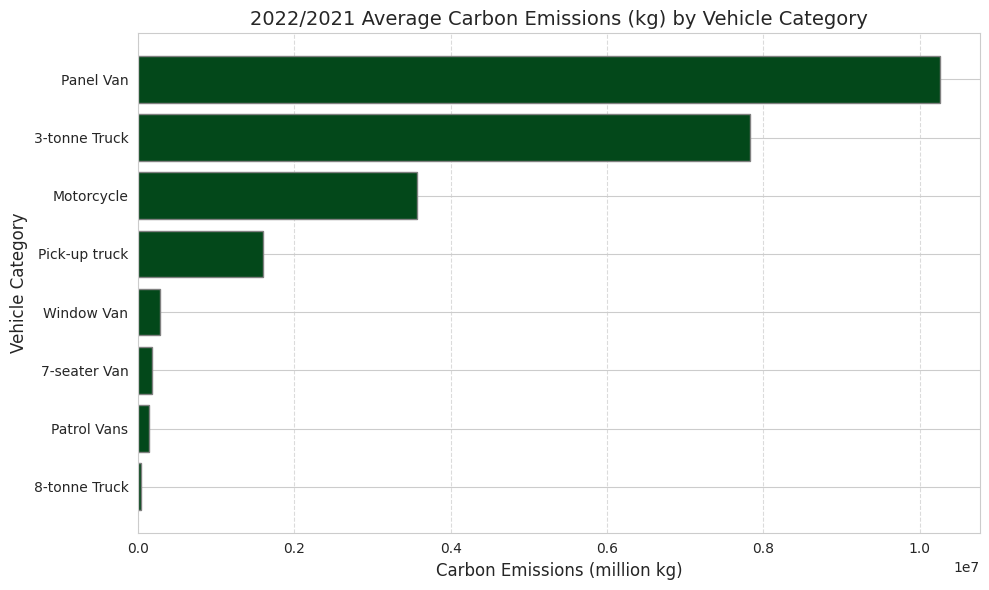

In [ ]:
# Data
categories = ['Panel Van', '3-tonne Truck', 'Motorcycle', 'Pick-up truck', 'Window Van', '7-seater Van', 'Patrol Vans', '8-tonne Truck']
efficiency = [1.025966e+07, 7.828019e+06	, 3.574289e+06, 1.599676e+06, 2.820621e+05, 1.805203e+05, 1.324558e+05, 3.055487e+04	]  # Carbon emissions (kg)

# Sort data
sorted_data = sorted(zip(efficiency, categories), reverse=True)
sorted_efficiency, sorted_categories = zip(*sorted_data)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_categories, sorted_efficiency, color='#03481A', edgecolor='grey')
plt.xlabel('Carbon Emissions (million kg)', fontsize=12)
plt.ylabel('Vehicle Category', fontsize=12)
plt.title('2022/2021 Average Carbon Emissions (kg) by Vehicle Category', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('carbon_emissions_bar_plot.png', dpi=300)  # Save plot as PNG for high resolution
plt.show()

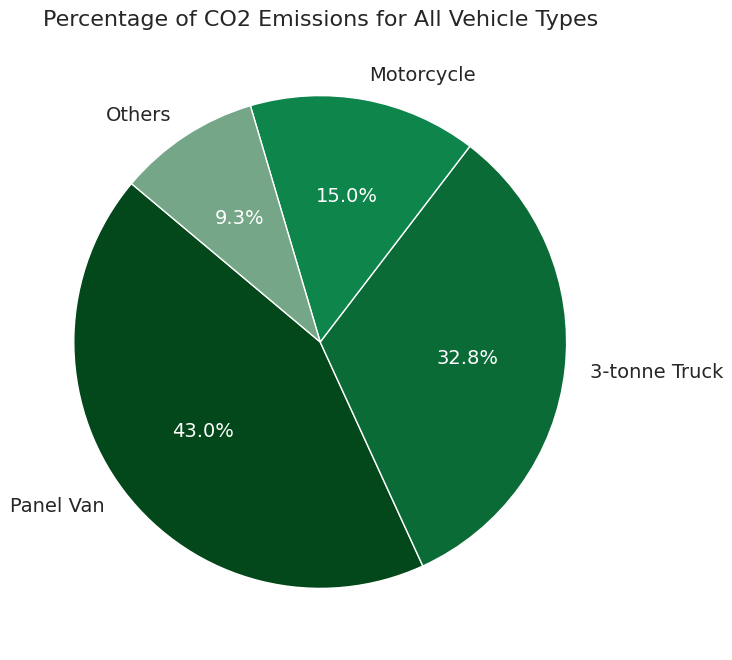

In [ ]:
# Now let's include all categories for the total efficiency calculation but still only display the three requested in the pie chart
filtered_efficiency = [eff for eff, cat in zip(efficiency, categories) if cat in ['Panel Van', '3-tonne Truck', 'Motorcycle']]
filtered_categories = ['Panel Van', '3-tonne Truck', 'Motorcycle']

# Calculate the total efficiency for percentage calculation from all vehicles
total_efficiency_all = sum(efficiency)

# Calculate the percentage for each of the three specified categories
percentages_all = [(eff / total_efficiency_all * 100) for eff in filtered_efficiency]

# We need to add the 'Other' category which encompasses the rest of the vehicles
other_percentage = 100 - sum(percentages_all)
percentages_all.append(other_percentage)
filtered_categories.append('Others')

# Colors for the pie chart, 'Other' category will be a different shade
colors = ['#03481A', '#0A6B36', '#0D854B', '#76A688']

# Adjusting the text color to white only for the percentages
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    percentages_all,
    labels=filtered_categories,
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 14}  # Keep labels default color (black)
)

# Change the autotexts (percentages) to white
for autotext in autotexts:
    autotext.set_color('white')

plt.title('Percentage of CO2 Emissions for All Vehicle Types', fontsize=16)
plt.show()

In [ ]:
total_percent_top3 = percentages_all[0]+percentages_all[1]+percentages_all[2]
print(total_percent_top3)

90.6842760279098


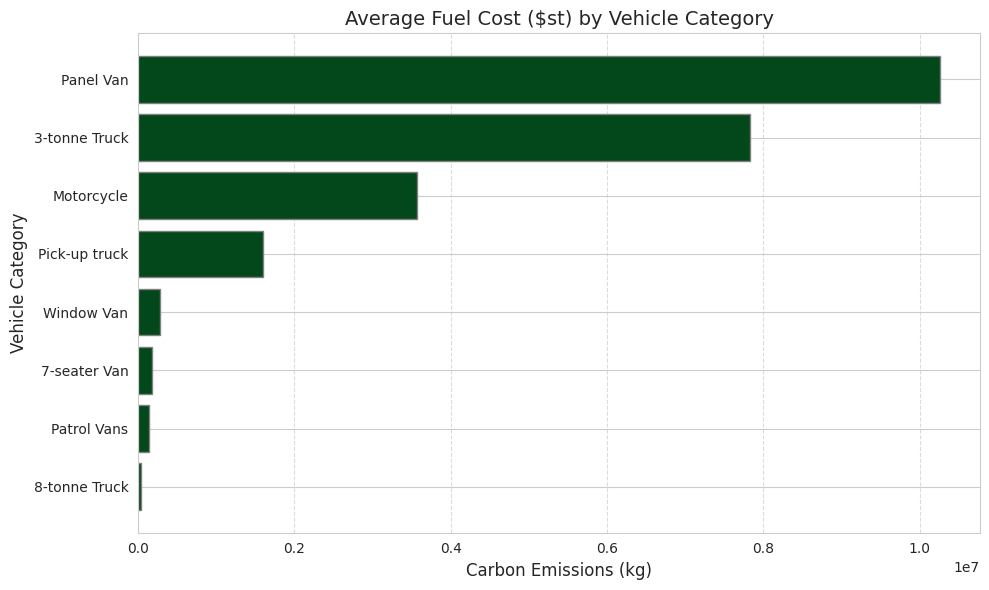

In [ ]:
# Data
categories = ['Panel Van', '3-tonne Truck', 'Motorcycle', 'Pick-up truck', 'Window Van', '7-seater Van', 'Patrol Vans', '8-tonne Truck']
efficiency = [1.025966e+07, 7.828019e+06	, 3.574289e+06, 1.599676e+06, 2.820621e+05, 1.805203e+05, 1.324558e+05, 3.055487e+04	]  # Carbon emissions (kg)

# Sort data
sorted_data = sorted(zip(efficiency, categories), reverse=True)
sorted_efficiency, sorted_categories = zip(*sorted_data)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_categories, sorted_efficiency, color='#03481A', edgecolor='grey')
plt.xlabel('Carbon Emissions (kg)', fontsize=12)
plt.ylabel('Vehicle Category', fontsize=12)
plt.title('Average Fuel Cost ($st) by Vehicle Category', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('carbon_emissions_bar_plot.png', dpi=300)
plt.show()

In [ ]:
fleet_log

,Category,Fuel Type,Fuel Amount2020 ($P),Liter2020,Travel Distance2020,Fuel Amount2021 ($P),Liter2021,Travel Distance2021,Total CO2 Emissions2020 (kg),Total CO2 Emissions2021 (kg),Average Total Distance,Average Total Litre,Average Total CO2 Emissions (kg),Average CO2 Emissions per Distance (kg/km)
0,Panel Van,Petrol,7705721.41,4.240481e+06,58688777,6915289.55,3.331226e+06,40950091,1.149170e+07,9.027624e+06,49819434.0,3.785854e+06,1.025966e+07,0.205937
1,3-tonne Truck,Diesel,4918997.72,2.682355e+06,15231565,5491541.56,2.417332e+06,14269241,8.234830e+06,7.421208e+06,14750403.0,2.549843e+06,7.828019e+06,0.530699
2,Motorcycle,Petrol,2376368.05,1.412794e+06,150247136,2476584.38,1.225057e+06,97880208,3.828672e+06,3.319905e+06,124063672.0,1.318926e+06,3.574289e+06,0.028810
3,Pick-up truck,Petrol,1158406.66,6.417273e+05,10745275,1112410.33,5.388451e+05,15175448,1.739081e+06,1.460270e+06,12960361.5,5.902862e+05,1.599676e+06,0.123428
4,Window Van,Petrol,187237.23,1.036989e+05,1124843,223046.59,1.044651e+05,2274372,2.810239e+05,2.831003e+05,1699607.5,1.040820e+05,2.820621e+05,0.165957
5,7-seater Van,Petrol,111603.56,6.633594e+04,752088,137990.50,6.688940e+04,664861,1.797704e+05,1.812703e+05,708474.5,6.661267e+04,1.805203e+05,0.254801
6,Patrol Vans,Petrol,81669.50,4.385491e+04,488666,113332.11,5.389842e+04,834534,1.188468e+05,1.460647e+05,661600.0,4.887666e+04,1.324558e+05,0.200205
7,8-tonne Truck,Diesel,31818.20,1.675080e+04,83839,6428.92,3.154654e+03,20733,5.142494e+04,9.684789e+03,52286.0,9.952725e+03,3.055487e+04,0.584379


In [ ]:
fleet_log['Average Total Fuel Amount'] = fleet_log['Fuel Amount2021 ($P)'] + fleet_log['Fuel Amount2020 ($P)']
fleet_log

fleet_log['Fuel Efficiency'] = fleet_log['Average Total Distance'] / fleet_log['Average Total Litre']
fleet_log

<ipython-input-84-3055e3b0922e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-84-3055e3b0922e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Category,Fuel Type,Fuel Amount2020 ($P),Liter2020,Travel Distance2020,Fuel Amount2021 ($P),Liter2021,Travel Distance2021,Total CO2 Emissions2020 (kg),Total CO2 Emissions2021 (kg),Average Total Distance,Average Total Litre,Average Total CO2 Emissions (kg),Average CO2 Emissions per Distance (kg/km),Average Total Fuel Amount,Fuel Efficiency
0,Panel Van,Petrol,7705721.41,4.240481e+06,58688777,6915289.55,3.331226e+06,40950091,1.149170e+07,9.027624e+06,49819434.0,3.785854e+06,1.025966e+07,0.205937,14621010.96,13.159366
1,3-tonne Truck,Diesel,4918997.72,2.682355e+06,15231565,5491541.56,2.417332e+06,14269241,8.234830e+06,7.421208e+06,14750403.0,2.549843e+06,7.828019e+06,0.530699,10410539.28,5.784827
2,Motorcycle,Petrol,2376368.05,1.412794e+06,150247136,2476584.38,1.225057e+06,97880208,3.828672e+06,3.319905e+06,124063672.0,1.318926e+06,3.574289e+06,0.028810,4852952.43,94.064188
3,Pick-up truck,Petrol,1158406.66,6.417273e+05,10745275,1112410.33,5.388451e+05,15175448,1.739081e+06,1.460270e+06,12960361.5,5.902862e+05,1.599676e+06,0.123428,2270816.99,21.956064
4,Window Van,Petrol,187237.23,1.036989e+05,1124843,223046.59,1.044651e+05,2274372,2.810239e+05,2.831003e+05,1699607.5,1.040820e+05,2.820621e+05,0.165957,410283.82,16.329512
5,7-seater Van,Petrol,111603.56,6.633594e+04,752088,137990.50,6.688940e+04,664861,1.797704e+05,1.812703e+05,708474.5,6.661267e+04,1.805203e+05,0.254801,249594.06,10.635732
6,Patrol Vans,Petrol,81669.50,4.385491e+04,488666,113332.11,5.389842e+04,834534,1.188468e+05,1.460647e+05,661600.0,4.887666e+04,1.324558e+05,0.200205,195001.61,13.536112
7,8-tonne Truck,Diesel,31818.20,1.675080e+04,83839,6428.92,3.154654e+03,20733,5.142494e+04,9.684789e+03,52286.0,9.952725e+03,3.055487e+04,0.584379,38247.12,5.253435


In [ ]:
# Assuming 'fleet_log' is your updated DataFrame:
file_path = '/content/drive/My Drive/Solus Prime Accenture Case/Data Provided/Data.csv'
fleet_log.to_csv(file_path, index=False)  # Save to CSV without the index.

file_path  # Display the file path to confirm where the file is saved.

'/content/drive/My Drive/Solus Prime Accenture Case/Data Provided/Data.csv'

<ipython-input-86-84cf694a4b76>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



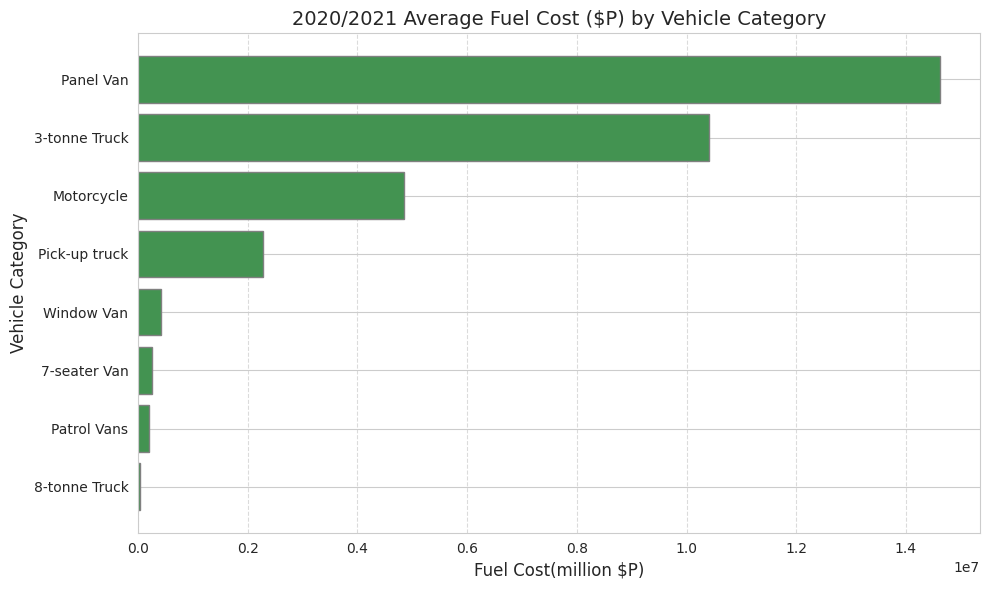

In [ ]:
fleet_log['Average Total Fuel Amount'] = fleet_log['Fuel Amount2021 ($P)'] + fleet_log['Fuel Amount2020 ($P)']
fleet_logcategories = ['Panel Van', '3-tonne Truck', 'Motorcycle', 'Pick-up truck', 'Window Van', '7-seater Van', 'Patrol Vans', '8-tonne Truck']
cost = [14621010.96, 10410539.28, 4852952.43, 2270816.99, 410283.82, 249594.06, 195001.61, 38247.12]  # Fuel Amount ($)

# Sort data
sorted_data = sorted(zip(cost, categories), reverse=True)
sorted_cost, sorted_categories = zip(*sorted_data)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_categories, sorted_cost, color='#439351', edgecolor='grey')
plt.xlabel('Fuel Cost(million $P)', fontsize=12)
plt.ylabel('Vehicle Category', fontsize=12)
plt.title('2020/2021 Average Fuel Cost ($P) by Vehicle Category', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have highest efficiency at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('fuel_cost.png', dpi=300)  # Save plot as PNG for high resolution
plt.show()

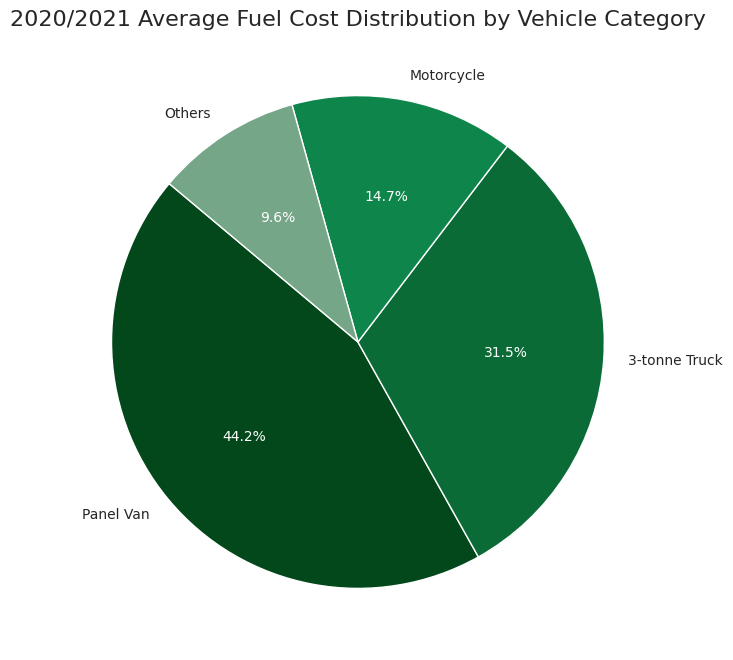

In [ ]:
# Given cost data for the pie chart, focusing only on Panel Van, 3-tonne Truck, and Motorcycle
filtered_cost = [cost for cost, cat in zip(cost, categories) if cat in ['Panel Van', '3-tonne Truck', 'Motorcycle']]
filtered_categories_cost = ['Panel Van', '3-tonne Truck', 'Motorcycle']

# Calculate the total cost for percentage calculation from all vehicles
total_cost_all = sum(cost)

# Calculate the percentage for each of the three specified categories
percentages_cost_all = [(c/ total_cost_all * 100) for c in filtered_cost]

# Add the 'Other' category which encompasses the rest of the vehicles
other_percentage_cost = 100 - sum(percentages_cost_all)
percentages_cost_all.append(other_percentage_cost)
filtered_categories_cost.append('Others')

# Colors for the pie chart, 'Other' category will be a different shade
colors_cost_pie = ['#03481A', '#0A6B36', '#0D854B', '#76A688']

# Plotting the pie chart with all categories included
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    percentages_cost_all,
    labels=filtered_categories_cost,
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
    startangle=140,
    colors=colors_cost_pie
)

# Change the autotexts (percentages) to white for visibility
for autotext in autotexts:
    autotext.set_color('white')

plt.title('2020/2021 Average Fuel Cost Distribution by Vehicle Category', fontsize=16)
plt.show()


**Observations**: The top 3 least carbon-efficient across both years (most carbon produced per distance) are 8-tonne Truck, 3-tonne Truck and 7-seater Van.


---


8-tonne Truck and 3-tonne Truck show high emissions per distance, which makes sense as trucks are typically less fuel-efficient and have higher emissions.
The 7-seater Van, Panel Van, and Patrol Vans are in the middle range.
Motorcycles show the lowest emissions per distance traveled, which is consistent with expectations due to their smaller engines and higher fuel efficiency.

# 1(b) Find the total number of each type of vehicle and each model:

In [ ]:
# Load in all the relevant excel sheets
fleet_data_path = '/content/drive/My Drive/Solus Prime Accenture Case/Data Provided/Fleet Data.xlsx'
fleet_data = pd.read_excel(fleet_data_path)
fleet_data.head()

# The current fleet size = 10167 vehicles
# fleet_data.count()

,District,Category,Type,Business Unit,Vehicle Brand,Vehicle Model,Vehicle Manufactured Year
0,Heritage Highlands,Motorcycle,Motorcycle,Domestic Parcels,HONDA,C1004-MA,2008
1,Heritage Highlands,Motorcycle,Motorcycle,Domestic Parcels,HONDA,C1004-MA,2008
2,Heritage Highlands,Motorcycle,Motorcycle,Domestic Parcels,HONDA,C1004-MA,2008
3,Heritage Highlands,Motorcycle,Motorcycle,Domestic Parcels,HONDA,C1004-MA,2008
4,Heritage Highlands,Motorcycle,Motorcycle,Domestic Parcels,HONDA,C1004-MA,2008


In [ ]:
# Check for missing values
missing_values = fleet_data.isnull().sum()
missing_values

District                     0
Category                     0
Type                         0
Business Unit                0
Vehicle Brand                0
Vehicle Model                0
Vehicle Manufactured Year    0
dtype: int64

In [ ]:
# Categorical data analysis - Vehicle Manufactured Year
# A standard car should only last up to 15 years, do research.
vehicle_year_trend = fleet_data['Vehicle Manufactured Year'].value_counts().sort_index()
vehicle_year_trend

1990       2
1993       1
2000       1
2001       4
2002       6
2003       4
2004       1
2005      43
2006      87
2007     252
2008    1737
2009     208
2010     172
2011     105
2012     706
2013    1321
2014    2788
2015     638
2016    1039
2017     999
2018       3
2019      50
Name: Vehicle Manufactured Year, dtype: int64

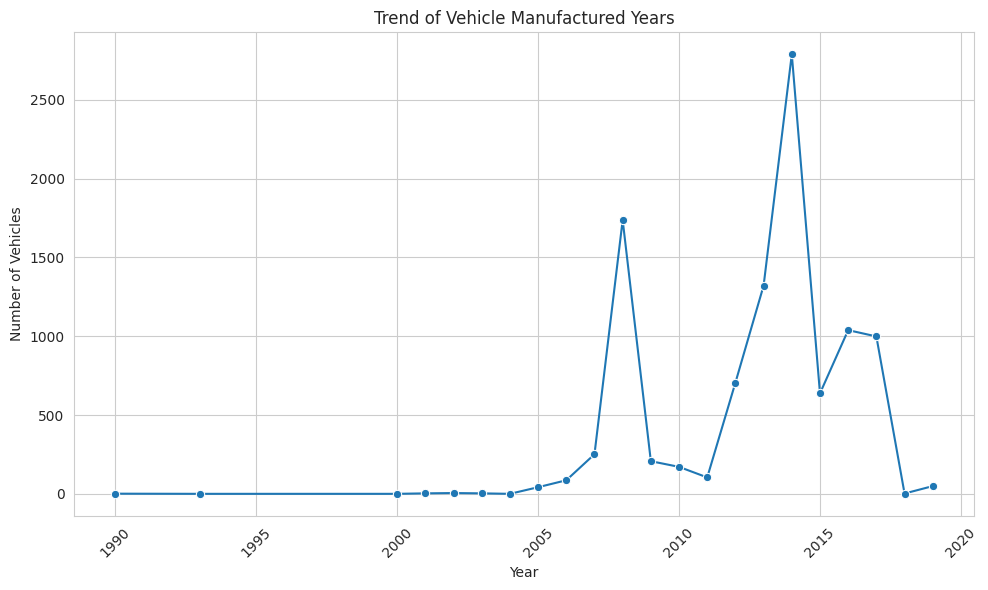

In [ ]:
# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Visualization 1: Trend of Vehicle Manufactured Years
plt.figure(figsize=(10, 6))
sns.lineplot(x=vehicle_year_trend.index, y=vehicle_year_trend.values, marker="o")
plt.title('Trend of Vehicle Manufactured Years')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()

**Observation:** Trend of Vehicle Manufactured Years: This line graph shows a significant increase in the number of vehicles manufactured, especially from 2008 onwards, peaking in 2014. It suggests a period of rapid fleet expansion or renewal.

In [ ]:
# find the lifespan for each vehicle.
# - Panel Van -> 10-15 years or 200,000 to 300,000 miles
# - 3-tonne Truck -> 10-15 years or over 300,000 miles
# - Motorcycle -> 12-15 years or 20,000 to 50,000 miles
# - Pick-up Truck -> 10-20 years or 200,000 to 300,000 miles
# - Window Van -> 10-15 years or 200,000 to 300,000 miles
# - 7-seater Van -> 10-15 years or 200,000 to 300,000 miles
# - Patrol Vans -> Often replaced after 5-10 years due to policies or usage intensity, can handle high mileages
# - 8-tonne Truck -> 10-15 years or over 300,000 miles

old_dates = {
    'Motorcycle': 2009,
    'Panel Van': 2009,
    'Patrol Vans': 2009,
    'Window Van': 2009,
    '7-seater Van': 2009,
    '8-tonne truck': 2009,
    'Pick-up truck': 2009,
    '3-tonne truck': 2009
}
# List out the rows where Years<=2005, these are likely the ones which can be replaced (+ even more so if they have high carbon output)
older_vehicles = fleet_data[fleet_data.apply(lambda x: x['Vehicle Manufactured Year'] < old_dates.get(x['Category'], 2024), axis=1)].copy()

# there is 4650 of them
print(older_vehicles)

# Find vehicles with highest carbon emissions and are old
inefficient_categories = ['Panel Van', '3-tonne Truck', 'Motorcycle']
replacement_vehicles = older_vehicles[older_vehicles['Category'].isin(inefficient_categories)].copy()
replacement_vehicles.count()
print(replacement_vehicles) # there is 2990 vehicles that can be replaced

                District      Category        Type          Business Unit  \
0     Heritage Highlands    Motorcycle  Motorcycle       Domestic Parcels   
1     Heritage Highlands    Motorcycle  Motorcycle       Domestic Parcels   
2     Heritage Highlands    Motorcycle  Motorcycle       Domestic Parcels   
3     Heritage Highlands    Motorcycle  Motorcycle       Domestic Parcels   
4     Heritage Highlands    Motorcycle  Motorcycle       Domestic Parcels   
...                  ...           ...         ...                    ...   
8140         Home Valley    Motorcycle  Motorcycle       Domestic Parcels   
8141         Home Valley    Motorcycle  Motorcycle  International Parcels   
8142         Home Valley    Motorcycle  Motorcycle       Domestic Parcels   
8143     Palmara Central    Motorcycle  Motorcycle  International Parcels   
8374         Home Valley  7-seater Van         Van      Support Functions   

     Vehicle Brand Vehicle Model  Vehicle Manufactured Year  
0            

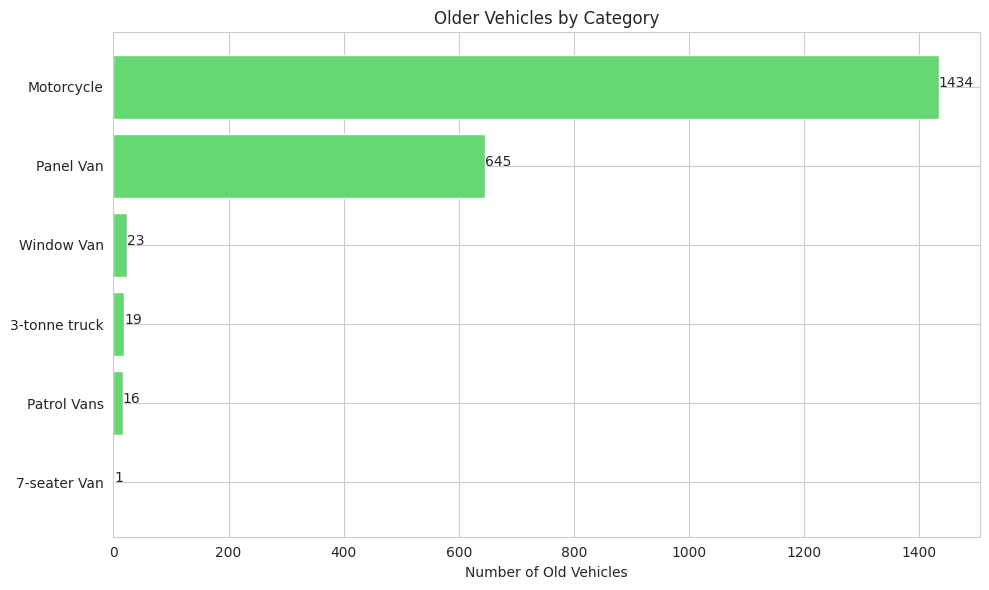

In [ ]:
older_vehicles_by_category = older_vehicles['Category'].value_counts()
older_vehicles_by_category.sort_values(inplace=True)
plt.figure(figsize=(10, 6))
plt.barh(older_vehicles_by_category.index, older_vehicles_by_category.values, color='#66D873')
plt.xlabel('Number of Old Vehicles')
plt.title('Older Vehicles by Category')
for index, value in enumerate(older_vehicles_by_category.values):
    plt.text(value, index, str(value))
plt.tight_layout()
plt.show()

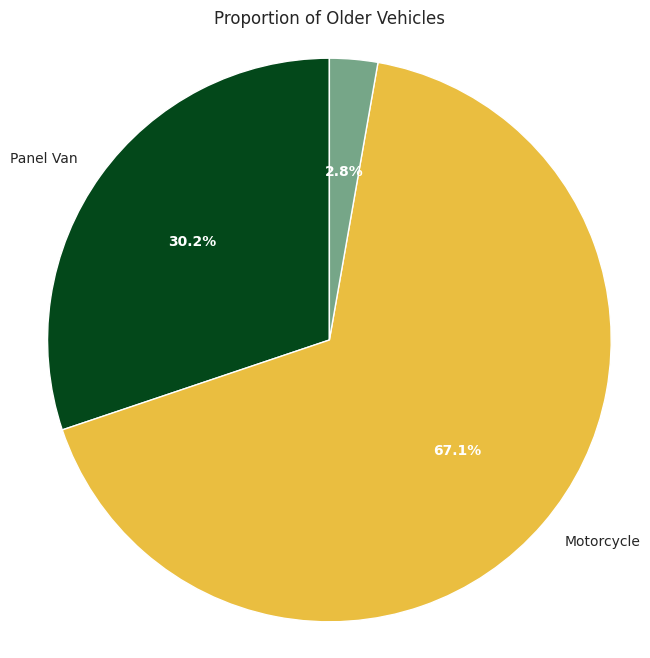

In [ ]:
# Based on the previous data, we'll now create a pie chart and remove the label for 'Others'

# Assuming 'older_vehicles_by_category' is a pandas Series with the counts of older vehicles by category
# Extract the counts for Panel Vans and Motorcycles
panel_van_count = older_vehicles_by_category.get('Panel Van', 0)
motorcycle_count = older_vehicles_by_category.get('Motorcycle', 0)

# Calculate the count for 'Others'
other_vehicles_count = older_vehicles_by_category.sum() - (panel_van_count + motorcycle_count)

# Prepare the data for the pie chart, removing the 'Others' label
pie_data = [panel_van_count, motorcycle_count, other_vehicles_count]
pie_labels = ['Panel Van', 'Motorcycle', '']  # Empty label for 'Others'

# Define the colors for each section
colors = ['#03481A', '#EABE40', '#76A688']

# Plot the pie chart
plt.figure(figsize=(8, 8))
wedges, labels, autotexts = plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Change the autotexts (percentage labels) to white and bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Proportion of Older Vehicles')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


In [ ]:
# Calculate the total number of vehicles in the fleet_data
total_vehicles = fleet_data.shape[0]

# Calculate the number of older vehicles based on the old_dates criteria
number_of_older_vehicles = older_vehicles.shape[0]

# Percentage of vehicles that are of old age out of the entire fleet_data
percentage_older_vehicles = (number_of_older_vehicles / total_vehicles) * 100

# Number of Motorcycles, Panel Vans, and 3-tonne trucks in the older vehicles
older_motorcycles_count = older_vehicles[older_vehicles['Category'] == 'Motorcycle'].shape[0]
older_panel_vans_count = older_vehicles[older_vehicles['Category'] == 'Panel Van'].shape[0]
older_3_tonne_trucks_count = older_vehicles[older_vehicles['Category'] == '3-tonne Truck'].shape[0]

# Percentage of these specific vehicle types among the older vehicles
percentage_older_motorcycles = (older_motorcycles_count / number_of_older_vehicles) * 100
percentage_older_panel_vans = (older_panel_vans_count / number_of_older_vehicles) * 100
percentage_older_3_tonne_trucks = (older_3_tonne_trucks_count / number_of_older_vehicles) * 100

# Output the results
print(f"Percentage of older vehicles: {percentage_older_vehicles:.2f}%")
print(f"Percentage of Motorcycles: {percentage_older_motorcycles:.2f}%")
print(f"Percentage of Panel Vans: {percentage_older_panel_vans:.2f}%")
print(f"Percentage of 3-tonne Trucks: {percentage_older_3_tonne_trucks:.2f}%")


Percentage of older vehicles: 21.03%
Percentage of Motorcycles: 67.07%
Percentage of Panel Vans: 30.17%
Percentage of 3-tonne Trucks: 0.00%


**Observation:** These vehicles are **15** years and older, making them highly eligible for replacement with an EV. Given the financial constraints, we should prioritize the older vehicles that have higher carbon emissions per distance travelled.

In [ ]:
# Categorical data analysis - District
district_count = fleet_data['District'].value_counts()
district_count

Eagle Beach           2174
Home Valley           1395
Serenity Coast        1163
Heritage Highlands     864
Child's Bay Town       736
Emerald Bay            693
Waking Hill            555
Spiky Bay              503
Azure Coast            446
Harmony Harbour        394
Crescent Point         380
Sandy District         370
Marlowe Square         315
Palmara Central        179
Name: District, dtype: int64

In [ ]:
# Categorical data analysis - Category
category_count = fleet_data['Category'].value_counts()
category_count

Motorcycle       6628
Panel Van        2466
Pick-up truck     552
3-tonne truck     331
7-seater Van       69
Patrol Vans        49
Window Van         48
8-tonne truck      24
Name: Category, dtype: int64

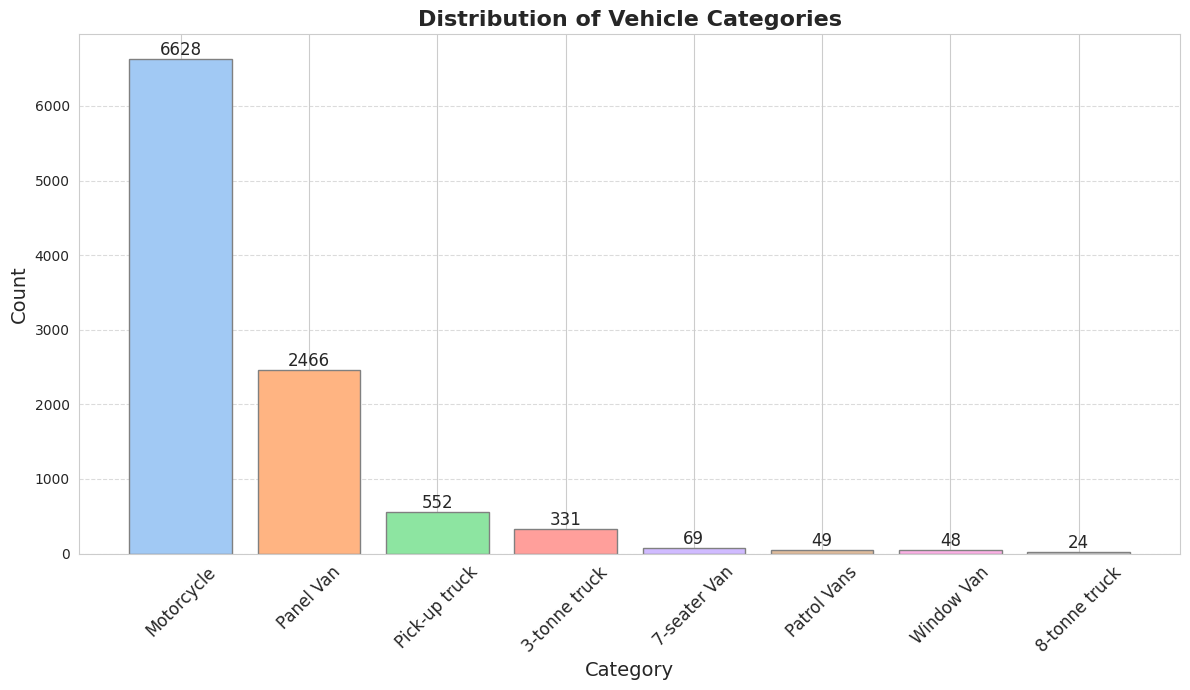

In [ ]:
# Visualization 2: Distribution of Vehicle Categories
# Assuming 'category_count' is a Series or DataFrame column with counts for each vehicle category
plt.figure(figsize=(12, 7))

# Using seaborn's color palette for a more appealing look
colors = sns.color_palette('pastel')[0:len(category_count)]

# Creating the bar plot with added colors and edgecolor for definition
plt.bar(category_count.index, category_count.values, color=colors, edgecolor='gray')

# Adding titles and labels with a larger font for clarity
plt.title('Distribution of Vehicle Categories', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Adding gridlines for better readability of the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optionally, you could add annotations/text on top of each bar to show the count
for index, value in enumerate(category_count.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels and ensure everything fits well
plt.show()

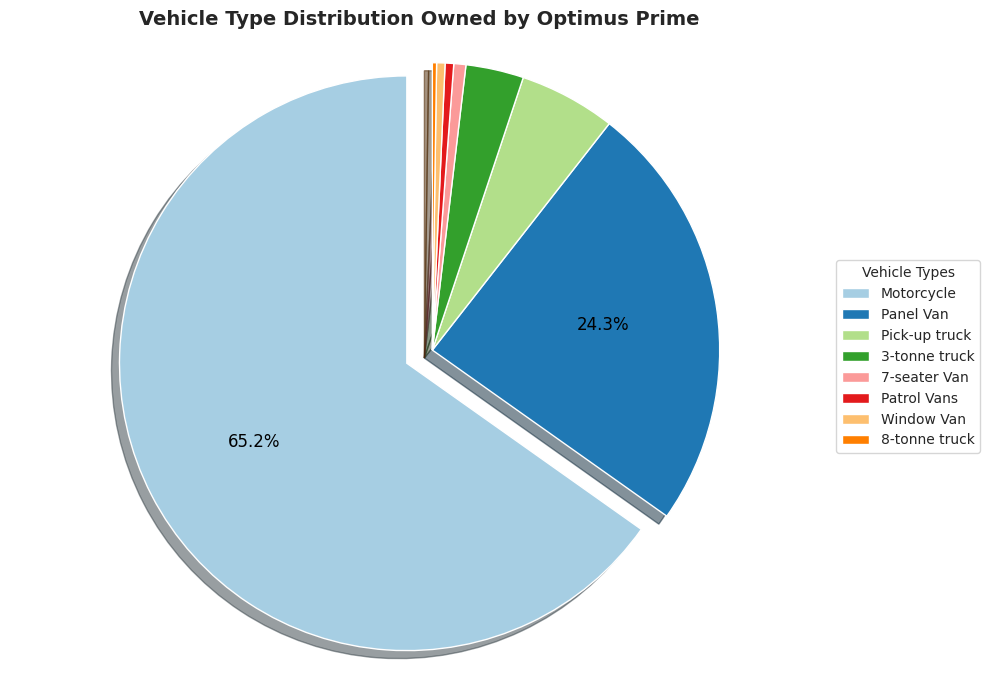

In [ ]:
# Assuming 'category_count' is predefined
explode = [0.1 if category == 'Motorcycle' else 0 for category in category_count.index]  # Explode for Motorcycle

# Define a custom autopct function to only show the percentage for Motorcycle
def custom_autopct(pct):
    return ('{:.1f}%'.format(pct)) if pct > 10 else ''  # Adjust the condition based on your data

plt.figure(figsize=(10, 7))
pie_wedges, texts, autotexts = plt.pie(category_count.values, startangle=90, colors=plt.cm.Paired.colors, explode=explode,
                                       autopct=custom_autopct, shadow=True)

# Make the autopct texts (percentages) larger for visibility, Motorcycle only
for autotext in autotexts:
    autotext.set_color('black')  # Optional: change color to make it stand out
    autotext.set_fontsize(12)

plt.legend(pie_wedges, category_count.index, title="Vehicle Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Vehicle Type Distribution Owned by Optimus Prime', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()

plt.show()

**Distribution of Vehicle Categories:** The bar chart reveals a high predominance of motorcycles in the fleet, followed by panel van and pick-up trucks. This distribution underscores the fleet's operational focus or the nature of the services provided.

In [ ]:
# Categorical data analysis - Vehicle Brand
vehicle_brand_count = fleet_data['Vehicle Brand'].value_counts()
vehicle_brand_count

GENOS         5195
TOYOTA        1844
HONDA         1434
NISSAN         634
TATA           584
ISUZU          285
DAIHATSU        76
GOLDING         68
MITSUBISHI      31
HINO            16
Name: Vehicle Brand, dtype: int64

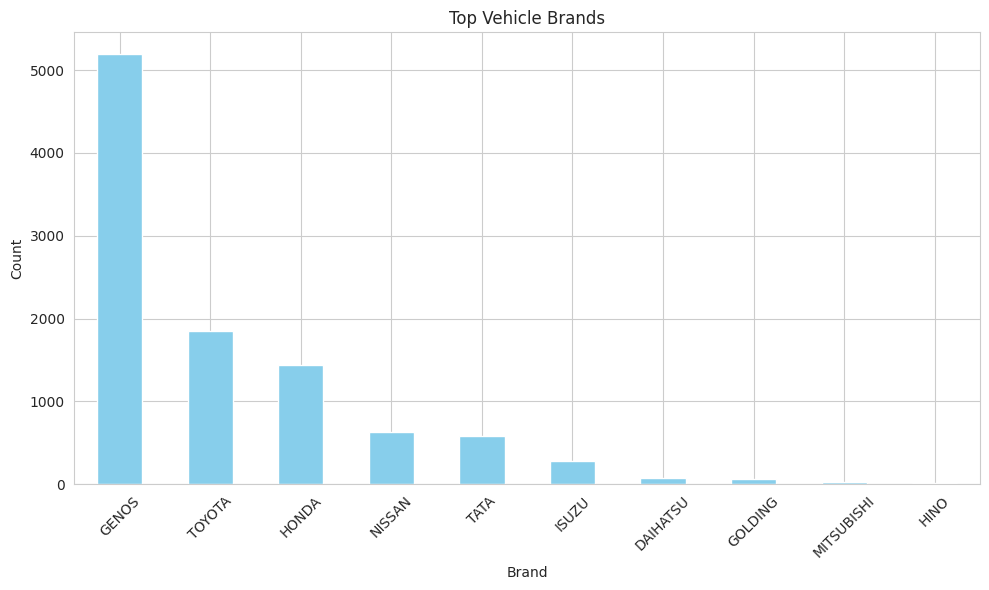

In [ ]:
# Visualization 3: Top Vehicle Brands
plt.figure(figsize=(10, 6))
vehicle_brand_count.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Vehicle Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Top Vehicle Brands:** This bar chart highlights 'GENOS' as the most common vehicle brand in the fleet, followed by 'TOYOTA' and 'HONDA'. This visualization points towards brand preferences or procurement strategies within the fleet management.

# 2. Calculation of Cost of Solution

---

# 2(b part 1) Cost of Telematics: - Wee Din

In [ ]:
# Looking at the current fleet
fleet_data

# From here find the cost of setting up telematics with existing fleet
setup_costs = {
    'Motorcycle': 200,
    'Panel Van': 300,
    'Patrol Vans': 300,
    'Window Van': 300,
    '7-seater Van': 300,
    '8-tonne truck': 500,
    'Pick-up truck': 500,
    '3-tonne truck': 500
}

# Map the purchase costs to the vehicles in the DataFrame
fleet_data['Setup Cost'] = fleet_data['Category'].map(setup_costs)

# Show the updated DataFrame with the 'Setup Cost' column
print(fleet_data.head())

             District    Category        Type     Business Unit Vehicle Brand  \
0  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
1  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
2  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
3  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
4  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   

  Vehicle Model  Vehicle Manufactured Year  Setup Cost  
0      C1004-MA                       2008         200  
1      C1004-MA                       2008         200  
2      C1004-MA                       2008         200  
3      C1004-MA                       2008         200  
4      C1004-MA                       2008         200  


In [ ]:
# Count the number of each vehicle type in the DataFrame
print(f"Total Number of Motorcycles: {fleet_data[fleet_data['Category'] == 'Motorcycle'].shape[0]}")
print(f"Total Number of Panel Vans: {fleet_data[fleet_data['Category'] == 'Panel Van'].shape[0]}")
print(f"Total Number of Patrol Vans: {fleet_data[fleet_data['Category'] == 'Patrol Vans'].shape[0]}")
print(f"Total Number of Window Vans: {fleet_data[fleet_data['Category'] == 'Window Van'].shape[0]}")
print(f"Total Number of 7-seater Vans: {fleet_data[fleet_data['Category'] == '7-seater Van'].shape[0]}")
print(f"Total Number of 8-tonne Trucks: {fleet_data[fleet_data['Category'] == '8-tonne truck'].shape[0]}")
print(f"Total Number of Pick-up Trucks: {fleet_data[fleet_data['Category'] == 'Pick-up truck'].shape[0]}")
print(f"Total Number of 3-tonne Trucks: {fleet_data[fleet_data['Category'] == '3-tonne truck'].shape[0]}\n")

# Show the total cost of setting up each vehicle type
print(f"Total Cost of Motorcycles: {fleet_data[fleet_data['Category'] == 'Motorcycle'].shape[0]*setup_costs['Motorcycle']:,}")
print(f"Total Cost of Panel Vans: {fleet_data[fleet_data['Category'] == 'Panel Van'].shape[0]*setup_costs['Panel Van']:,}")
print(f"Total Cost of Patrol Vans: {fleet_data[fleet_data['Category'] == 'Patrol Vans'].shape[0]*setup_costs['Patrol Vans']:,}")
print(f"Total Cost of Window Vans: {fleet_data[fleet_data['Category'] == 'Window Van'].shape[0]*setup_costs['Window Van']:,}")
print(f"Total Cost of 7-seater Vans: {fleet_data[fleet_data['Category'] == '7-seater Van'].shape[0]*setup_costs['7-seater Van']:,}")
print(f"Total Cost of 8-tonne Trucks: {fleet_data[fleet_data['Category'] == '8-tonne truck'].shape[0]*setup_costs['8-tonne truck']:,}")
print(f"Total Cost of Pick-up Trucks: {fleet_data[fleet_data['Category'] == 'Pick-up truck'].shape[0]*setup_costs['Pick-up truck']:,}")
print(f"Total Cost of 3-tonne Trucks: {fleet_data[fleet_data['Category'] == '3-tonne truck'].shape[0]*setup_costs['3-tonne truck']:,}")

Total Number of Motorcycles: 6628
Total Number of Panel Vans: 2466
Total Number of Patrol Vans: 49
Total Number of Window Vans: 48
Total Number of 7-seater Vans: 69
Total Number of 8-tonne Trucks: 24
Total Number of Pick-up Trucks: 552
Total Number of 3-tonne Trucks: 331

Total Cost of Motorcycles: 1,325,600
Total Cost of Panel Vans: 739,800
Total Cost of Patrol Vans: 14,700
Total Cost of Window Vans: 14,400
Total Cost of 7-seater Vans: 20,700
Total Cost of 8-tonne Trucks: 12,000
Total Cost of Pick-up Trucks: 276,000
Total Cost of 3-tonne Trucks: 165,500


In [ ]:
# Show the Total Cost of Setting up Telematics
total_setup_cost = fleet_data['Setup Cost'].sum()
current_number_of_vehicles = fleet_data.shape[0]
print("\nTotal Cost of Setting up Telematics:")
print(f"Total Telematics Setup Cost: ${total_setup_cost:,.2f}")
print(f"Number of Vehicles to be set up: {current_number_of_vehicles}")


Total Cost of Setting up Telematics:
Total Telematics Setup Cost: $2,568,700.00
Number of Vehicles to be set up: 10167


# 2(b part 2) Cost-savings of Telematics: - Wee Din

In [ ]:
telematics_ICE_fuel_savings = { #15% fuel savings for ICE
    'Motorcycle': 0.85,
    'Panel Van': 0.85,
    'Patrol Vans': 0.85,
    'Window Van': 0.85,
    '7-seater Van': 0.85,
    '8-tonne Truck': 0.85,
    'Pick-up truck': 0.85,
    '3-tonne Truck': 0.85
}

telematics_EV_fuel_savings = { #20% fuel savings for ICE
    'Motorcycle': 0.8,
    'Panel Van': 0.8,
    'Patrol Vans': 0.8,
    'Window Van': 0.8,
    '7-seater Van': 0.8,
    '8-tonne Truck': 0.8,
    'Pick-up truck': 0.8,
    '3-tonne Truck': 0.8
}

fuel_price = {
    'Petrol': 2.05,
    'Diesel': 2.15
}

In [ ]:
# Remove 'TOTAL' row from the calculation
fleet_log_filtered = fleet_log[fleet_log['Category'] != 'TOTAL'].copy()

# Calculate the average values for 2020 and 2021
fleet_log_filtered['Average Liters'] = (fleet_log_filtered['Liter2020'] + fleet_log_filtered['Liter2021']) / 2
fleet_log_filtered['Average Fuel Amount'] = (fleet_log_filtered['Fuel Amount2020 ($P)'] + fleet_log_filtered['Fuel Amount2021 ($P)']) / 2
fleet_log_filtered['Average Travel Distance'] = (fleet_log_filtered['Travel Distance2020'] + fleet_log_filtered['Travel Distance2021']) / 2
fleet_log_filtered

# Create another dataframe
avg_fuel_and_distance = fleet_log_filtered[['Category','Fuel Type', 'Average Liters', 'Average Travel Distance']].copy()

# Calculate the new litre amount after implementing telematics on existing fleet
avg_fuel_and_distance['Current Emissions'] = avg_fuel_and_distance.apply(lambda row: row['Average Liters'] * emission_factors.get(row['Fuel Type'], 1), axis=1)
avg_fuel_and_distance['Telematics ICE Average Liters'] = avg_fuel_and_distance['Average Liters'] * 0.85
avg_fuel_and_distance['Telematics Emissions'] = avg_fuel_and_distance.apply(lambda row: row['Telematics ICE Average Liters'] * emission_factors.get(row['Fuel Type'], 1), axis=1)

avg_fuel_and_distance['Telematics Emissions Reduction'] = avg_fuel_and_distance['Current Emissions'] - avg_fuel_and_distance['Telematics Emissions']

avg_fuel_and_distance

,Category,Fuel Type,Average Liters,Average Travel Distance,Current Emissions,Telematics ICE Average Liters,Telematics Emissions,Telematics Emissions Reduction
0,Panel Van,Petrol,3.785854e+06,49819434.0,1.025966e+07,3.217976e+06,8.720714e+06,1.538950e+06
1,3-tonne Truck,Diesel,2.549843e+06,14750403.0,7.828019e+06,2.167367e+06,6.653816e+06,1.174203e+06
2,Motorcycle,Petrol,1.318926e+06,124063672.0,3.574289e+06,1.121087e+06,3.038145e+06,5.361433e+05
3,Pick-up truck,Petrol,5.902862e+05,12960361.5,1.599676e+06,5.017433e+05,1.359724e+06,2.399513e+05
4,Window Van,Petrol,1.040820e+05,1699607.5,2.820621e+05,8.846966e+04,2.397528e+05,4.230931e+04
5,7-seater Van,Petrol,6.661267e+04,708474.5,1.805203e+05,5.662077e+04,1.534423e+05,2.707805e+04
6,Patrol Vans,Petrol,4.887666e+04,661600.0,1.324558e+05,4.154516e+04,1.125874e+05,1.986836e+04
7,8-tonne Truck,Diesel,9.952725e+03,52286.0,3.055487e+04,8.459816e+03,2.597164e+04,4.583230e+03


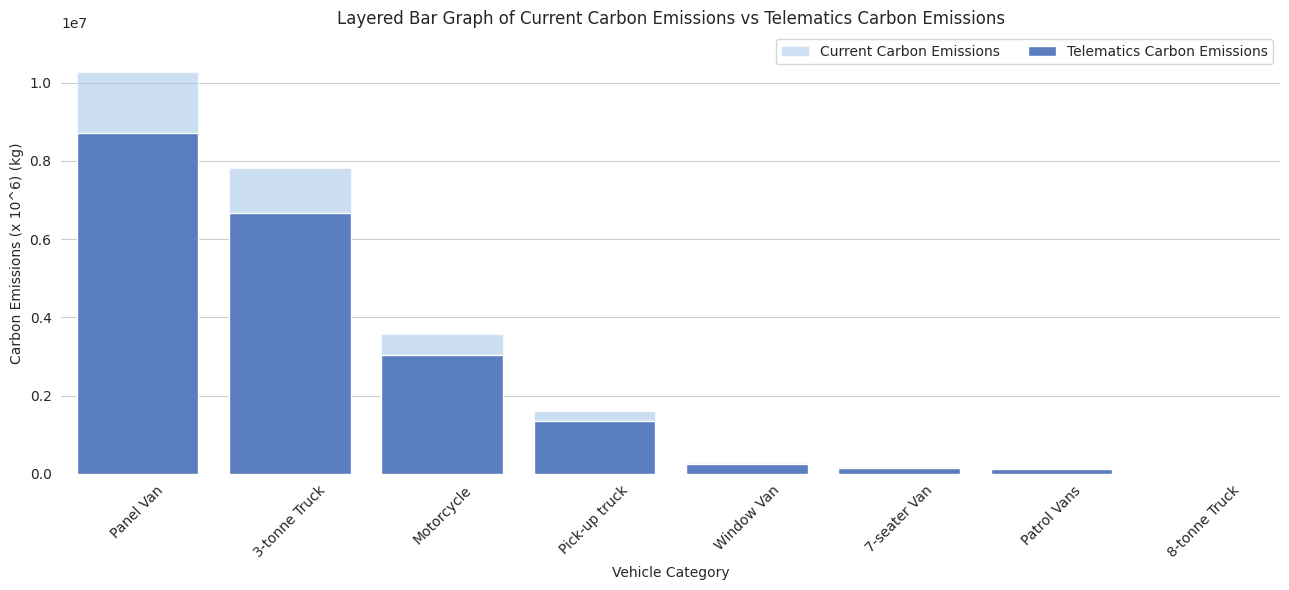

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (13, 6))

# Plot the current fuel cost
sns.set_color_codes("pastel")
sns.barplot(x = "Category", y = "Current Emissions", data = avg_fuel_and_distance,
            label = "Current Carbon Emissions", color = "b", alpha = 0.6)

# Plot the telematics fuel cost on top
sns.set_color_codes("muted")
sns.barplot(x = "Category", y = "Telematics Emissions", data = avg_fuel_and_distance,
            label = "Telematics Carbon Emissions", color = "b")

# Add a legend and informative axis label
ax.legend(ncol = 2, loc = "upper right", frameon = True)
ax.set(ylim = (0, max(avg_fuel_and_distance['Current Emissions']) * 1.1), ylabel = "Carbon Emissions (x 10^6) (kg)",
       xlabel = "Vehicle Category", title = "Layered Bar Graph of Current Carbon Emissions vs Telematics Carbon Emissions")

# for i in ax.containers:
#   ax.bar_label(i, )

sns.despine(left = True, bottom = True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation = 45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Create another dataframe
avg_cost = fleet_log_filtered[['Category','Fuel Type', 'Average Liters', 'Average Fuel Amount']].copy()

# Calculate the new litre amount after implementing telematics on existing fleet
avg_cost['Current Cost'] = avg_cost.apply(lambda row: row['Average Liters'] * fuel_price.get(row['Fuel Type'], 1), axis=1)
avg_cost['Telematics ICE Average Liters'] = avg_cost['Average Liters'] * 0.85
avg_cost['Telematics Cost'] = avg_cost.apply(lambda row: row['Telematics ICE Average Liters'] * fuel_price.get(row['Fuel Type'], 1), axis=1)

avg_cost['Telematics Cost Savings'] = avg_cost['Current Cost'] - avg_cost['Telematics Cost']

avg_cost

,Category,Fuel Type,Average Liters,Average Fuel Amount,Current Cost,Telematics ICE Average Liters,Telematics Cost,Telematics Cost Savings
0,Panel Van,Petrol,3.785854e+06,7310505.480,7.761000e+06,3.217976e+06,6.596850e+06,1.164150e+06
1,3-tonne Truck,Diesel,2.549843e+06,5205269.640,5.482163e+06,2.167367e+06,4.659839e+06,8.223245e+05
2,Motorcycle,Petrol,1.318926e+06,2426476.215,2.703798e+06,1.121087e+06,2.298228e+06,4.055696e+05
3,Pick-up truck,Petrol,5.902862e+05,1135408.495,1.210087e+06,5.017433e+05,1.028574e+06,1.815130e+05
4,Window Van,Petrol,1.040820e+05,205141.910,2.133680e+05,8.846966e+04,1.813628e+05,3.200520e+04
5,7-seater Van,Petrol,6.661267e+04,124797.030,1.365560e+05,5.662077e+04,1.160726e+05,2.048340e+04
6,Patrol Vans,Petrol,4.887666e+04,97500.805,1.001972e+05,4.154516e+04,8.516759e+04,1.502957e+04
7,8-tonne Truck,Diesel,9.952725e+03,19123.560,2.139836e+04,8.459816e+03,1.818861e+04,3.209754e+03


In [ ]:
# Calculate percentage cost savings
avg_cost['Percentage Fuel Cost Savings'] = (avg_cost['Telematics Cost Savings'] / avg_cost['Current Cost']) * 100

avg_cost


,Category,Fuel Type,Average Liters,Average Fuel Amount,Current Cost,Telematics ICE Average Liters,Telematics Cost,Telematics Cost Savings,Percentage Fuel Cost Savings
0,Panel Van,Petrol,3.785854e+06,7310505.480,7.761000e+06,3.217976e+06,6.596850e+06,1.164150e+06,15.0
1,3-tonne Truck,Diesel,2.549843e+06,5205269.640,5.482163e+06,2.167367e+06,4.659839e+06,8.223245e+05,15.0
2,Motorcycle,Petrol,1.318926e+06,2426476.215,2.703798e+06,1.121087e+06,2.298228e+06,4.055696e+05,15.0
3,Pick-up truck,Petrol,5.902862e+05,1135408.495,1.210087e+06,5.017433e+05,1.028574e+06,1.815130e+05,15.0
4,Window Van,Petrol,1.040820e+05,205141.910,2.133680e+05,8.846966e+04,1.813628e+05,3.200520e+04,15.0
5,7-seater Van,Petrol,6.661267e+04,124797.030,1.365560e+05,5.662077e+04,1.160726e+05,2.048340e+04,15.0
6,Patrol Vans,Petrol,4.887666e+04,97500.805,1.001972e+05,4.154516e+04,8.516759e+04,1.502957e+04,15.0
7,8-tonne Truck,Diesel,9.952725e+03,19123.560,2.139836e+04,8.459816e+03,1.818861e+04,3.209754e+03,15.0


In [ ]:
# Calculate percentage cost savings
avg_cost['Percentage Cost Savings'] = (avg_cost['Telematics Cost Savings'] / avg_cost['Current Cost']) * 100

avg_cost


,Category,Fuel Type,Average Liters,Average Fuel Amount,Current Cost,Telematics ICE Average Liters,Telematics Cost,Telematics Cost Savings,Percentage Fuel Cost Savings,Percentage Cost Savings
0,Panel Van,Petrol,3.785854e+06,7310505.480,7.761000e+06,3.217976e+06,6.596850e+06,1.164150e+06,15.0,15.0
1,3-tonne Truck,Diesel,2.549843e+06,5205269.640,5.482163e+06,2.167367e+06,4.659839e+06,8.223245e+05,15.0,15.0
2,Motorcycle,Petrol,1.318926e+06,2426476.215,2.703798e+06,1.121087e+06,2.298228e+06,4.055696e+05,15.0,15.0
3,Pick-up truck,Petrol,5.902862e+05,1135408.495,1.210087e+06,5.017433e+05,1.028574e+06,1.815130e+05,15.0,15.0
4,Window Van,Petrol,1.040820e+05,205141.910,2.133680e+05,8.846966e+04,1.813628e+05,3.200520e+04,15.0,15.0
5,7-seater Van,Petrol,6.661267e+04,124797.030,1.365560e+05,5.662077e+04,1.160726e+05,2.048340e+04,15.0,15.0
6,Patrol Vans,Petrol,4.887666e+04,97500.805,1.001972e+05,4.154516e+04,8.516759e+04,1.502957e+04,15.0,15.0
7,8-tonne Truck,Diesel,9.952725e+03,19123.560,2.139836e+04,8.459816e+03,1.818861e+04,3.209754e+03,15.0,15.0


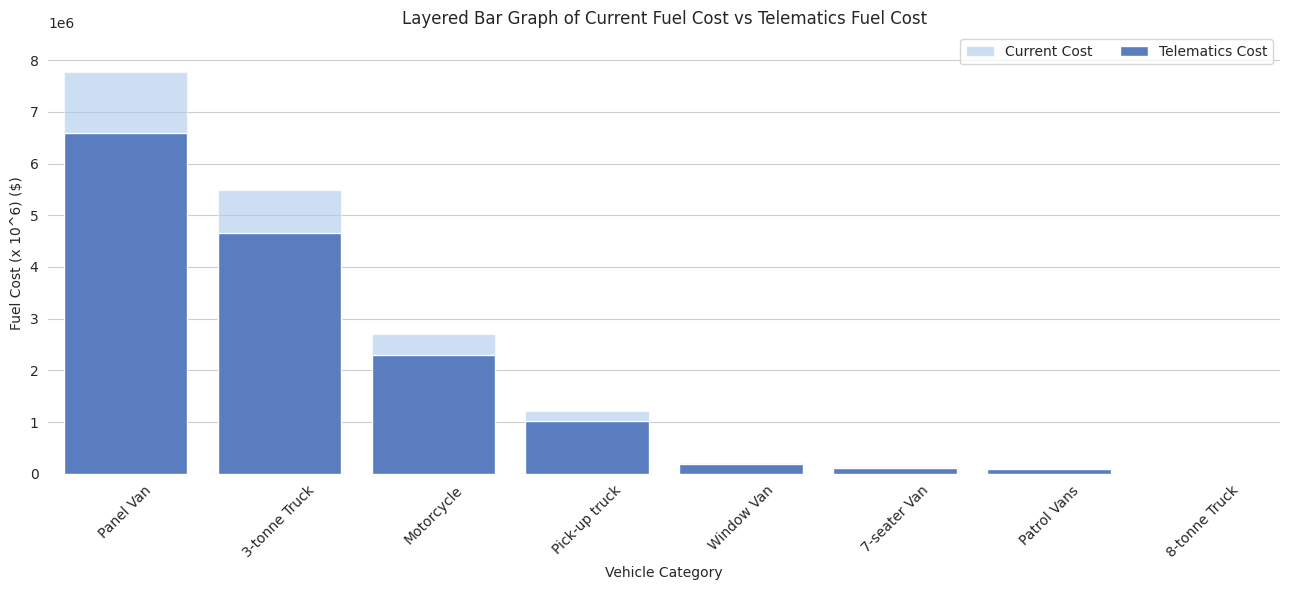

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (13, 6))

# Plot the current fuel cost
sns.set_color_codes("pastel")
sns.barplot(x = "Category", y = "Current Cost", data = avg_cost,
            label = "Current Cost", color = "b", alpha = 0.6)

# Plot the telematics fuel cost on top
sns.set_color_codes("muted")
sns.barplot(x = "Category", y = "Telematics Cost", data = avg_cost,
            label = "Telematics Cost", color = "b")

# Add a legend and informative axis label
ax.legend(ncol = 2, loc = "upper right", frameon = True)
ax.set(ylim = (0, max(avg_cost['Current Cost']) * 1.1), ylabel = "Fuel Cost (x 10^6) ($)",
       xlabel = "Vehicle Category", title = "Layered Bar Graph of Current Fuel Cost vs Telematics Fuel Cost")

# for i in ax.containers:
#   ax.bar_label(i, )

sns.despine(left = True, bottom = True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation = 45)
plt.tight_layout()

# Show the plot
plt.show()

# 2(c) Cost of Electrification of Fleet: - Angie



## 2(c part 1) Replacing Retired Vehicles with EVS

In [ ]:
# Calculate the cost of purchasing the above
purchase_costs = {
    'Motorcycle': 8000,
    'Panel Van': 180000,
    'Patrol Vans': 180000,
    'Window Van': 180000,
    '7-seater Van': 180000,
    '8-tonne truck': 250000,
    'Pick-up truck': 250000,
    '3-tonne truck': 250000
}

# Analyse the short-term maintenance cost for just changing the 26 7-seater Van
ICEmaintenance_cost_per_1000km = {
    'Motorcycle': 8,
    'Panel Van': 42,
    'Patrol Vans': 42,
    'Window Van': 42,
    '7-seater Van': 42,
    '8-tonne Truck': 84,
    'Pick-up truck': 84,
    '3-tonne Truck': 84
}

EVmaintenance_cost_per_1000km = {
    'Motorcycle': 7,
    'Panel Van': 29,
    'Patrol Vans': 29,
    'Window Van': 29,
    '7-seater Van': 29,
    '8-tonne Truck': 67,
    'Pick-up truck': 67,
    '3-tonne Truck': 67
}

# Calculate the purchase cost for these vehicles
# Map the purchase costs to the vehicles in the DataFrame
older_vehicles['Purchase Cost'] = older_vehicles['Category'].map(purchase_costs)

# Show the updated DataFrame with the 'Purchase Cost' column
print(older_vehicles.head())

# Show the Total Cost of switching the current old vehicles to EVs
total_purchase_cost = older_vehicles['Purchase Cost'].sum()
total_number_of_vehicles = older_vehicles.shape[0]  # number of rows
print("\nTotal Cost of Switching old vehicles to EVs:")
print(f"Total Purchase Cost: ${total_purchase_cost:,.2f}")
print(f"Number of Vehicles to be replaced: {total_number_of_vehicles}")


# Also calculate what is the Total Cost of switching the entire fleet
fleet_data['Purchase Cost'] = fleet_data['Category'].map(purchase_costs)
total_fleet_purchase_cost = fleet_data['Purchase Cost'].sum()
total_number_of_fleet_vehicles = fleet_data.shape[0]  # number of rows
print("\nTotal Cost of Switching the entire fleet to EVs:")
print(f"Total Purchase Cost: ${total_fleet_purchase_cost:,.2f}")
print(f"Number of Vehicles to be replaced: {total_number_of_fleet_vehicles}")


             District    Category        Type     Business Unit Vehicle Brand  \
0  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
1  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
2  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
3  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
4  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   

  Vehicle Model  Vehicle Manufactured Year  Purchase Cost  
0      C1004-MA                       2008           8000  
1      C1004-MA                       2008           8000  
2      C1004-MA                       2008           8000  
3      C1004-MA                       2008           8000  
4      C1004-MA                       2008           8000  

Total Cost of Switching old vehicles to EVs:
Total Purchase Cost: $139,522,000.00
Number of Vehicles to be replaced: 2138

Total Cost of Switching the e

In [ ]:
# Maintenance cost per 1000 km for ICE and BEV
ICE_maintenance_cost_per_1000km = {
    'Motorcycle': 8,
    'Van': 42,
    'Truck': 84
}

EV_maintenance_cost_per_1000km = {
    'Motorcycle': 7,
    'Van': 29,
    'Truck': 67
}

# Total average distance for older vehicles
total_average_distance = {
    'Motorcycle': 124063672.0,
    'Panel Van': 49819434.0,
    '3-tonne truck': 14750403.0,
    'Window Van': 1699607.5,
    'Patrol Vans': 661600.0,
    '7-seater Van': 708474.5,
    '8-tonne truck': 52286.0,
    'Pick-up truck': 12960361.5
}

# Older vehicles count to be replaced
older_vehicles_to_replace = {
    'Motorcycle': 6628,
    'Panel Van': 2466,
    '3-tonne truck': 331,
    'Window Van': 48,
    'Patrol Vans': 49,
    '7-seater Van': 69,
    '8-tonne truck': 24,
    'Pick-up truck': 552
}

# Vehicle category mapping to maintenance cost types
category_map = {
    'Motorcycle': 'Motorcycle',
    'Panel Van': 'Van',
    '3-tonne truck': 'Truck',
    'Window Van': 'Van',
    'Patrol Vans': 'Van',
    '7-seater Van': 'Van',
    '8-tonne truck': 'Truck',
    'Pick-up truck': 'Truck'
}

# Initialize savings dictionary
savings = {}


# Calculate savings for each category
for category, count in older_vehicles_to_replace.items():
    # Map the vehicle category to its maintenance cost type
    cost_type = category_map[category]

    # Calculate total distances for the number of vehicles to be replaced
    total_dist = total_average_distance[category]

    # Calculate the maintenance costs for ICE and BEV
    total_ICE_cost = (total_dist / 1000) * ICE_maintenance_cost_per_1000km[cost_type]
    total_EV_cost = (total_dist / 1000) * EV_maintenance_cost_per_1000km[cost_type]

    # Calculate and store the savings
    savings[category] = total_ICE_cost - total_EV_cost

# Calculate total savings across all categories
total_savings_across_categories = sum(savings.values())

print(f"Total maintenance cost-savings across all older vehicles replaced with EVs: ${total_savings_across_categories:,.2f}")
for category, saving in savings.items():
    print(f"{category}: ${saving:,.2f} savings")

# Initialize savings dictionary
savings_percentage = {}

# Calculate total ICE maintenance costs across all categories
total_ICE_cost_all_categories = sum((total_average_distance[category] / 1000) * ICE_maintenance_cost_per_1000km[category_map[category]] for category in older_vehicles_to_replace)

# Calculate savings percentage for each category
for category, count in older_vehicles_to_replace.items():
    # Map the vehicle category to its maintenance cost type
    cost_type = category_map[category]

    # Calculate total distances for the number of vehicles to be replaced
    total_dist = total_average_distance[category]

    # Calculate the maintenance costs for ICE and BEV
    total_ICE_cost = (total_dist / 1000) * ICE_maintenance_cost_per_1000km[cost_type]
    total_EV_cost = (total_dist / 1000) * EV_maintenance_cost_per_1000km[cost_type]

    # Calculate the percentage cost savings and store it
    savings_percentage[category] = ((total_ICE_cost - total_EV_cost) / total_ICE_cost) * 100

# Calculate total savings percentage across all categories
total_savings_percentage_across_categories = (total_savings_across_categories / total_ICE_cost_all_categories) * 100

print(f"Total maintenance cost-savings percentage across all older vehicles replaced with EVs: {total_savings_percentage_across_categories:.2f}%")
for category, saving_percentage in savings_percentage.items():
    print(f"{category}: {saving_percentage:.2f}% savings")




Total maintenance cost-savings across all older vehicles replaced with EVs: $1,283,594.04
Motorcycle: $124,063.67 savings
Panel Van: $647,652.64 savings
3-tonne truck: $250,756.85 savings
Window Van: $22,094.90 savings
Patrol Vans: $8,600.80 savings
7-seater Van: $9,210.17 savings
8-tonne truck: $888.86 savings
Pick-up truck: $220,326.15 savings
Total maintenance cost-savings percentage across all older vehicles replaced with EVs: 23.14%
Motorcycle: 12.50% savings
Panel Van: 30.95% savings
3-tonne truck: 20.24% savings
Window Van: 30.95% savings
Patrol Vans: 30.95% savings
7-seater Van: 30.95% savings
8-tonne truck: 20.24% savings
Pick-up truck: 20.24% savings


In [ ]:
EV_energy_efficiency = {
    'Motorcycle': 0.09,
    'Panel Van': 0.26,
    '3-tonne Truck': 1.5,
    'Window Van': 0.26,
    'Patrol Vans': 0.26,
    '7-seater Van': 0.26,
    '8-tonne Truck': 1.5,
    'Pick-up truck': 1.5
}
# Calculate total fuel cost for each vehicle category
fleet_log['Total Fuel Cost'] = (fleet_log['Fuel Amount2020 ($P)'] + fleet_log['Fuel Amount2021 ($P)']) / 2

# Calculate total electricity cost for each vehicle category
fleet_log['Total Electricity Cost'] = (fleet_log['Average Total Distance'] * fleet_log['Category'].apply(lambda x: EV_energy_efficiency.get(x, 0)) * 0.4)

# Sum up total fuel and electricity costs for the entire fleet
total_fuel_cost = fleet_log['Total Fuel Cost'].sum()
total_electricity_cost = fleet_log['Total Electricity Cost'].sum()

# Calculate change in fuel cost
change_in_fuel_cost = total_fuel_cost - total_electricity_cost

# Calculate percentage change in fuel cost and round to the nearest integer
percentage_change_in_fuel_cost = round((change_in_fuel_cost / total_fuel_cost) * 100)

print("Percentage Change in fuel cost if switching whole fleet to EVs:", percentage_change_in_fuel_cost, "%")


Percentage Change in fuel cost if switching whole fleet to EVs: -61 %


<ipython-input-114-0077d6f6af33>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-114-0077d6f6af33>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

# Calculate the percentage change in fuel cost for each vehicle type
fleet_log['Percentage Change in Fuel Cost'] = ((fleet_log['Total Fuel Cost'] - fleet_log['Total Electricity Cost']) / fleet_log['Total Fuel Cost']) * 100

# Now you have the percentage change in fuel cost for each vehicle category in the 'Percentage Change in Fuel Cost' column
print(fleet_log[['Category', 'Percentage Change in Fuel Cost']])


        Category  Percentage Change in Fuel Cost
0      Panel Van                       29.126363
1  3-tonne Truck                      -70.024656
2     Motorcycle                      -84.064948
3  Pick-up truck                     -584.882748
4     Window Van                       13.835656
5   7-seater Van                       40.959053
6    Patrol Vans                       29.429916
7  8-tonne Truck                      -64.046862


<ipython-input-115-ebb6f365f74f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fleet_log

,Category,Fuel Type,Fuel Amount2020 ($P),Liter2020,Travel Distance2020,Fuel Amount2021 ($P),Liter2021,Travel Distance2021,Total CO2 Emissions2020 (kg),Total CO2 Emissions2021 (kg),Average Total Distance,Average Total Litre,Average Total CO2 Emissions (kg),Average CO2 Emissions per Distance (kg/km),Average Total Fuel Amount,Fuel Efficiency,Total Fuel Cost,Total Electricity Cost,Percentage Change in Fuel Cost
0,Panel Van,Petrol,7705721.41,4.240481e+06,58688777,6915289.55,3.331226e+06,40950091,1.149170e+07,9.027624e+06,49819434.0,3.785854e+06,1.025966e+07,0.205937,14621010.96,13.159366,7310505.480,5181221.136,29.126363
1,3-tonne Truck,Diesel,4918997.72,2.682355e+06,15231565,5491541.56,2.417332e+06,14269241,8.234830e+06,7.421208e+06,14750403.0,2.549843e+06,7.828019e+06,0.530699,10410539.28,5.784827,5205269.640,8850241.800,-70.024656
2,Motorcycle,Petrol,2376368.05,1.412794e+06,150247136,2476584.38,1.225057e+06,97880208,3.828672e+06,3.319905e+06,124063672.0,1.318926e+06,3.574289e+06,0.028810,4852952.43,94.064188,2426476.215,4466292.192,-84.064948
3,Pick-up truck,Petrol,1158406.66,6.417273e+05,10745275,1112410.33,5.388451e+05,15175448,1.739081e+06,1.460270e+06,12960361.5,5.902862e+05,1.599676e+06,0.123428,2270816.99,21.956064,1135408.495,7776216.900,-584.882748
4,Window Van,Petrol,187237.23,1.036989e+05,1124843,223046.59,1.044651e+05,2274372,2.810239e+05,2.831003e+05,1699607.5,1.040820e+05,2.820621e+05,0.165957,410283.82,16.329512,205141.910,176759.180,13.835656
5,7-seater Van,Petrol,111603.56,6.633594e+04,752088,137990.50,6.688940e+04,664861,1.797704e+05,1.812703e+05,708474.5,6.661267e+04,1.805203e+05,0.254801,249594.06,10.635732,124797.030,73681.348,40.959053
6,Patrol Vans,Petrol,81669.50,4.385491e+04,488666,113332.11,5.389842e+04,834534,1.188468e+05,1.460647e+05,661600.0,4.887666e+04,1.324558e+05,0.200205,195001.61,13.536112,97500.805,68806.400,29.429916
7,8-tonne Truck,Diesel,31818.20,1.675080e+04,83839,6428.92,3.154654e+03,20733,5.142494e+04,9.684789e+03,52286.0,9.952725e+03,3.055487e+04,0.584379,38247.12,5.253435,19123.560,31371.600,-64.046862


In [ ]:
total_electricity_emissions_motorcycle = (124063672 * EV_energy_efficiency['Motorcycle'] * 0.55)
total_electricity_emissions_panel_van = (49819434 * EV_energy_efficiency['Panel Van'] * 0.55)
total_electricity_emissions_3tonne_truck = (14750403 * EV_energy_efficiency['3-tonne Truck'] * 0.55)
total_electricity_emissions_pickup_truck = (12960361 * EV_energy_efficiency['Pick-up truck'] * 0.55)
total_electricity_emissions_window_van = (1699607 * EV_energy_efficiency['Window Van'] * 0.55)
total_electricity_emissions_7seater_van = (708474 * EV_energy_efficiency['7-seater Van'] * 0.55)
total_electricity_emissions_patrol_vans = (661600 * EV_energy_efficiency['Patrol Vans'] * 0.55)
total_electricity_emissions_8tonne_truck = (52286 * EV_energy_efficiency['8-tonne Truck'] * 0.55)

total_electricity_emissions = (total_electricity_emissions_panel_van +
                               total_electricity_emissions_3tonne_truck +
                               total_electricity_emissions_motorcycle +
                               total_electricity_emissions_pickup_truck +
                               total_electricity_emissions_window_van +
                               total_electricity_emissions_7seater_van +
                               total_electricity_emissions_patrol_vans +
                               total_electricity_emissions_8tonne_truck)

total_petrol_emissions_panel_van = (fleet_log[fleet_log['Category'] == 'Panel Van']['Fuel Amount2020 ($P)'] + fleet_log[fleet_log['Category'] == 'Panel Van']['Fuel Amount2021 ($P)']).sum() * emission_factors['Petrol']
total_diesel_emissions_3_tonne_truck = (fleet_log[fleet_log['Category'] == '3-tonne Truck']['Fuel Amount2020 ($P)'] + fleet_log[fleet_log['Category'] == '3-tonne Truck']['Fuel Amount2021 ($P)']).sum() * emission_factors['Diesel']
total_petrol_emissions_motorcycle = (fleet_log[fleet_log['Category'] == 'Motorcycle']['Fuel Amount2020 ($P)'] + fleet_log[fleet_log['Category'] == 'Motorcycle']['Fuel Amount2021 ($P)']).sum() * emission_factors['Petrol']
total_petrol_emissions_pickup_truck = (fleet_log[fleet_log['Category'] == 'Pick-up truck']['Fuel Amount2020 ($P)'] + fleet_log[fleet_log['Category'] == 'Pick-up truck']['Fuel Amount2021 ($P)']).sum() * emission_factors['Petrol']
total_petrol_emissions_window_van = (fleet_log[fleet_log['Category'] == 'Window Van']['Fuel Amount2020 ($P)'] + fleet_log[fleet_log['Category'] == 'Window Van']['Fuel Amount2021 ($P)']).sum() * emission_factors['Petrol']
total_petrol_emissions_7_seater_van = (fleet_log[fleet_log['Category'] == '7-seater Van']['Fuel Amount2020 ($P)'] + fleet_log[fleet_log['Category'] == '7-seater Van']['Fuel Amount2021 ($P)']).sum() * emission_factors['Petrol']
total_petrol_emissions_patrol_vans = (fleet_log[fleet_log['Category'] == 'Patrol Vans']['Fuel Amount2020 ($P)'] + fleet_log[fleet_log['Category'] == 'Patrol Vans']['Fuel Amount2021 ($P)']).sum() * emission_factors['Petrol']
total_diesel_emissions_8_tonne_truck = (fleet_log[fleet_log['Category'] == '8-tonne Truck']['Fuel Amount2020 ($P)'] + fleet_log[fleet_log['Category'] == '8-tonne Truck']['Fuel Amount2021 ($P)']).sum() * emission_factors['Diesel']

total_petrol_emissions_panel_van /= 2
total_diesel_emissions_3_tonne_truck /= 2
total_petrol_emissions_motorcycle /= 2
total_petrol_emissions_pickup_truck /= 2
total_petrol_emissions_window_van /= 2
total_petrol_emissions_7_seater_van /= 2
total_petrol_emissions_patrol_vans /= 2
total_diesel_emissions_8_tonne_truck /= 2


total_internal_combustion_emissions = (
    total_petrol_emissions_panel_van +
    total_diesel_emissions_3_tonne_truck +
    total_petrol_emissions_motorcycle +
    total_petrol_emissions_pickup_truck +
    total_petrol_emissions_window_van +
    total_petrol_emissions_7_seater_van +
    total_petrol_emissions_patrol_vans +
    total_diesel_emissions_8_tonne_truck
)

# Calculate change in carbon emissions
change_in_carbon_emissions = total_internal_combustion_emissions -  total_electricity_emissions
print("Change in carbon emissions if switching to EVs:", change_in_carbon_emissions, "kgCO2")

# Calculate percentage change in carbon emissions
percentage_change_in_carbon_emissions = (change_in_carbon_emissions / total_internal_combustion_emissions) * 100
print("Percentage Change in carbon emissions if switching to EVs:", percentage_change_in_carbon_emissions, "%")

Change in carbon emissions if switching to EVs: 10052614.788848862 kgCO2
Percentage Change in carbon emissions if switching to EVs: 21.54373665188234 %


# 2(c part 2) Replacing high carbon emission ICE with EVs.

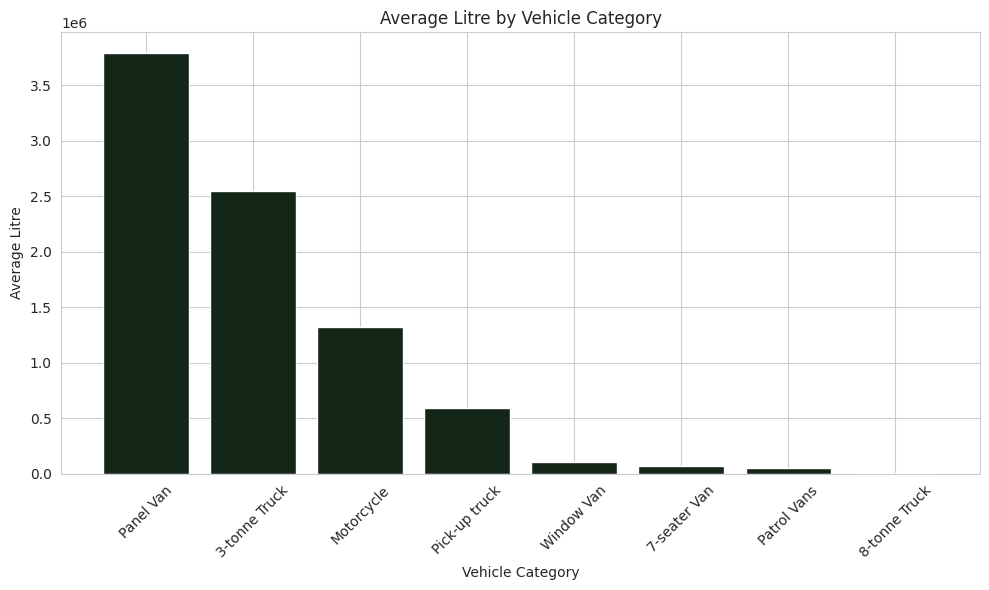

In [ ]:
# Sample data for categories and average total litre
fleet_log_filtered = fleet_log[fleet_log['Category'] != 'TOTAL']

plt.figure(figsize=(10, 6))
plt.bar(fleet_log_filtered['Category'], fleet_log_filtered['Average Total Litre'], color='#132618')
plt.title('Average Litre by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Average Litre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

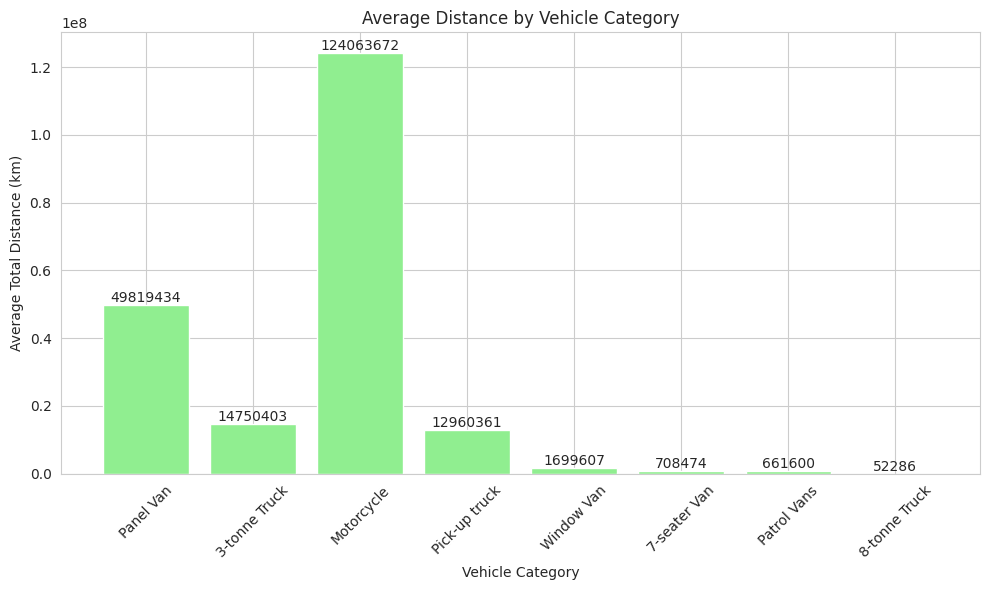

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(fleet_log_filtered['Category'], fleet_log_filtered['Average Total Distance'], color='lightgreen')
plt.title('Average Distance by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Average Total Distance (km)')
plt.xticks(rotation=45)

# Adding the actual numbers on top of each bar
for bar in bars:
    yval = bar.get_height()  # Getting the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval,  # Positioning the text
             int(yval),  # The actual number to display
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Find the cost of purchasing all of these high carbon emissions ICE
num_of_motorcycle = len(fleet_data[(fleet_data['Category'] == 'Motorcycle')])
num_of_motorcycle
num_of_3onne = len(fleet_data[(fleet_data['Category'] == '3-tonne truck')])
num_of_3onne
num_of_panel = len(fleet_data[(fleet_data['Category'] == 'Panel Van')])
num_of_panel

purchase_cost_of_vehicles = purchase_costs['Motorcycle'] * num_of_motorcycle + purchase_costs['3-tonne truck'] * num_of_3onne + purchase_costs['Panel Van'] * num_of_panel
purchase_cost_of_vehicles
print(f"Total purchase cost for high carbon emissions EVs: ${purchase_cost_of_vehicles:,.2f}")

# Calculate the purchase cost for each category
purchase_cost_motorcycle = purchase_costs['Motorcycle'] * num_of_motorcycle
purchase_cost_3tonne_truck = purchase_costs['3-tonne truck'] * num_of_3onne
purchase_cost_panel_van = purchase_costs['Panel Van'] * num_of_panel

# Print the respective costs
print(f"Number of Motorcycles: {num_of_motorcycle}")
print(f"Purchase Cost for Motorcycles: ${purchase_cost_motorcycle:,.2f}")

print(f"\nNumber of 3-tonne Trucks: {num_of_3onne}")
print(f"Purchase Cost for 3-tonne Trucks: ${purchase_cost_3tonne_truck:,.2f}")

print(f"\nNumber of Panel Vans: {num_of_panel}")
print(f"Purchase Cost for Panel Vans: ${purchase_cost_panel_van:,.2f}")


Total purchase cost for high carbon emissions EVs: $579,654,000.00
Number of Motorcycles: 6628
Purchase Cost for Motorcycles: $53,024,000.00

Number of 3-tonne Trucks: 331
Purchase Cost for 3-tonne Trucks: $82,750,000.00

Number of Panel Vans: 2466
Purchase Cost for Panel Vans: $443,880,000.00


In [ ]:
# Count of vehicles belonging to each category
category_counts = fleet_data[fleet_data['Category'].isin(['Motorcycle', '3-tonne truck', 'Panel Van'])]['Category'].value_counts()

print("Count of vehicles belonging to each category:")
print(category_counts)

Count of vehicles belonging to each category:
Motorcycle       6628
Panel Van        2466
3-tonne truck     331
Name: Category, dtype: int64


In [ ]:
# Cost-savings in Maintenance
total_average_distance_8_tonne_truck = 52286.0

# Calculate maintenance costs for current ICE motorcycles and future EV motorcycles
total_current_maintenance_cost = (total_average_distance_8_tonne_truck / 1000) * ICEmaintenance_cost_per_1000km['Motorcycle']
total_new_maintenance_cost = (total_average_distance_8_tonne_truck / 1000) * EVmaintenance_cost_per_1000km['Motorcycle']

# Calculate savings in dollars
total_savings = total_current_maintenance_cost - total_new_maintenance_cost

# Calculate the percentage of cost-savings
percentage_of_savings = (total_savings / total_current_maintenance_cost) * 100

# Print the maintenance cost-savings and percentage of cost-savings
print(f"The short-term maintenance cost-savings in 1 year from replacing ICE 8-tonne trucks with EVs is: ${total_savings:,.2f}")
print(f"Percentage of maintenance cost-savings: {percentage_of_savings:.2f}%")

fleet_data[fleet_data['Category'] == '8-tonne Truck'].count()

total_current_maintenance_cost

The short-term maintenance cost-savings in 1 year from replacing ICE 8-tonne trucks with EVs is: $52.29
Percentage of maintenance cost-savings: 12.50%


418.288

In [ ]:
# Cost-savings in Maintenance
total_average_distance_3_tonne_Truck = 14750403.0

# Calculate maintenance costs for current ICE motorcycles and future EV motorcycles
total_current_maintenance_cost = (total_average_distance_3_tonne_Truck / 1000) * ICEmaintenance_cost_per_1000km['Motorcycle']
total_new_maintenance_cost = (total_average_distance_3_tonne_Truck / 1000) * EVmaintenance_cost_per_1000km['Motorcycle']

# Calculate savings in dollars
total_savings = total_current_maintenance_cost - total_new_maintenance_cost

# Calculate the percentage of cost-savings
percentage_of_savings = (total_savings / total_current_maintenance_cost) * 100

# Print the maintenance cost-savings and percentage of cost-savings
print(f"The short-term maintenance cost-savings in 1 year from replacing ICE 3-tonne trucks with EVs is: ${total_savings:,.2f}")
print(f"Percentage of maintenance cost-savings: {percentage_of_savings:.2f}%")

fleet_data[fleet_data['Category'] == '3-tonne Truck'].count()

The short-term maintenance cost-savings in 1 year from replacing ICE 3-tonne trucks with EVs is: $14,750.40
Percentage of maintenance cost-savings: 12.50%


District                     0
Category                     0
Type                         0
Business Unit                0
Vehicle Brand                0
Vehicle Model                0
Vehicle Manufactured Year    0
Setup Cost                   0
Purchase Cost                0
dtype: int64

In [ ]:
# Cost-savings in Maintenance
total_average_distance_motorcycles = 124063672.0

# Calculate maintenance costs for current ICE motorcycles and future EV motorcycles
total_current_maintenance_cost = (total_average_distance_motorcycles / 1000) * ICEmaintenance_cost_per_1000km['Motorcycle']
total_new_maintenance_cost = (total_average_distance_motorcycles / 1000) * EVmaintenance_cost_per_1000km['Motorcycle']

# Calculate savings in dollars
total_savings = total_current_maintenance_cost - total_new_maintenance_cost

# Calculate the percentage of cost-savings
percentage_of_savings = (total_savings / total_current_maintenance_cost) * 100

# Print the maintenance cost-savings and percentage of cost-savings
print(f"The short-term maintenance cost-savings in 1 year from replacing ICE motorcycles with EVs is: ${total_savings:,.2f}")
print(f"Percentage of maintenance cost-savings: {percentage_of_savings:.2f}%")

fleet_data[fleet_data['Category'] == 'Motorcycle'].count()

The short-term maintenance cost-savings in 1 year from replacing ICE motorcycles with EVs is: $124,063.67
Percentage of maintenance cost-savings: 12.50%


District                     6628
Category                     6628
Type                         6628
Business Unit                6628
Vehicle Brand                6628
Vehicle Model                6628
Vehicle Manufactured Year    6628
Setup Cost                   6628
Purchase Cost                6628
dtype: int64

In [ ]:
electricity_cost_per_kWh = 0.4

# Filter fleet_log for specific categories
selected_categories = ['Motorcycle', 'Panel Van', '3-tonne Truck']
filtered_fleet_log = fleet_log[fleet_log['Category'].isin(selected_categories)]

# Calculate total fuel cost for each vehicle category
filtered_fleet_log['Total Fuel Cost'] = (filtered_fleet_log['Fuel Amount2020 ($P)'] + filtered_fleet_log['Fuel Amount2021 ($P)']) / 2

# Calculate total electricity cost for each vehicle category
filtered_fleet_log['Total Electricity Cost'] = (filtered_fleet_log['Average Total Distance'] * filtered_fleet_log['Category'].apply(lambda x: EV_energy_efficiency.get(x, 0)) *   electricity_cost_per_kWh )

# Sum up total fuel and electricity costs for the selected categories
total_fuel_cost_selected = filtered_fleet_log['Total Fuel Cost'].sum()
total_electricity_cost_selected = filtered_fleet_log['Total Electricity Cost'].sum()

# Calculate change in fuel cost
change_in_fuel_cost_selected = total_fuel_cost_selected - total_electricity_cost_selected

# Calculate percentage change in fuel cost and round to the nearest integer
percentage_change_in_fuel_cost_selected = round((change_in_fuel_cost_selected / total_fuel_cost_selected) * 100)

print("Percentage Change in fuel cost if switching selected categories to EVs:", percentage_change_in_fuel_cost_selected, "%")


Percentage Change in fuel cost if switching selected categories to EVs: -24 %


<ipython-input-125-3788b3ce54a0>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-125-3788b3ce54a0>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Calculate new fuel cost for each category
new_fuel_cost_motorcycle = total_fuel_cost_selected - filtered_fleet_log[filtered_fleet_log['Category'] == 'Motorcycle']['Total Electricity Cost'].sum()
new_fuel_cost_panel_van = total_fuel_cost_selected - filtered_fleet_log[filtered_fleet_log['Category'] == 'Panel Van']['Total Electricity Cost'].sum()
new_fuel_cost_3tonne_truck = total_fuel_cost_selected - filtered_fleet_log[filtered_fleet_log['Category'] == '3-tonne Truck']['Total Electricity Cost'].sum()

print("New Fuel Cost for Motorcycle: $", new_fuel_cost_motorcycle)
print("New Fuel Cost for Panel Van: $", new_fuel_cost_panel_van)
print("New Fuel Cost for 3-tonne Truck: $", new_fuel_cost_3tonne_truck)


New Fuel Cost for Motorcycle: $ 10475959.14299959
New Fuel Cost for Panel Van: $ 9761030.19899959
New Fuel Cost for 3-tonne Truck: $ 6092009.5349995885


In [ ]:
# Calculate total carbon emissions for electric motorcycles
total_electricity_emissions = (total_electricity_emissions_panel_van +
                                total_electricity_emissions_3tonne_truck +
                                total_electricity_emissions_motorcycle)

# Calculate total electricity needed for all vehicle categories
total_carbon_emissions_all_categories = (
    total_petrol_emissions_pickup_truck +
    total_petrol_emissions_window_van +
    total_petrol_emissions_7_seater_van +
    total_petrol_emissions_patrol_vans +
    total_diesel_emissions_8_tonne_truck
)

# Calculate change in carbon emissions for the selected categories
change_in_carbon_emissions_selected = total_internal_combustion_emissions - (total_carbon_emissions_all_categories + total_electricity_emissions)
print("Change in carbon emissions for selected categories if switching to EVs:", change_in_carbon_emissions_selected, "kgCO2")

# Calculate percentage change in carbon emissions
percentage_change_in_carbon_emissions_selected = (change_in_carbon_emissions_selected / total_internal_combustion_emissions) * 100
print("Percentage Change in carbon emissions for selected categories if switching to EVs:", percentage_change_in_carbon_emissions_selected, "%")

Change in carbon emissions for selected categories if switching to EVs: 16932984.887248866 kgCO2
Percentage Change in carbon emissions for selected categories if switching to EVs: 36.28904268229369 %


In [ ]:
# Define the total average distance for each vehicle category (as provided in the previous context)
total_average_distance_motorcycle = 124063672
total_average_distance_panel_van = 49819434
total_average_distance_3tonne_truck = 14750403

# Define the current number of vehicles for each category
curr_no_of_motorcycle = 6628
curr_no_of_panel_van = # Fill in the current number of panel vans
curr_no_of_3tonne_truck = # Fill in the current number of 3-tonne trucks

# Define the number of vehicles to be replaced for each category
replace_no_of_motorcycle = 2079
replace_no_of_panel_van = # Fill in the number of panel vans to be replaced
replace_no_of_3tonne_truck = # Fill in the number of 3-tonne trucks to be replaced

# Calculate the new average distance for each category after replacement with EVs
EV_total_average_distance_motorcycle = (total_average_distance_motorcycle / curr_no_of_motorcycle) * replace_no_of_motorcycle
EV_total_average_distance_panel_van = (total_average_distance_panel_van / curr_no_of_panel_van) * replace_no_of_panel_van
EV_total_average_distance_3tonne_truck = (total_average_distance_3tonne_truck / curr_no_of_3tonne_truck) * replace_no_of_3tonne_truck

# Calculate the new maintenance costs for each category
new_maintenance_cost_motorcycle = ((total_average_distance_motorcycle - EV_total_average_distance_motorcycle) / 1000) * ICEmaintenance_cost_per_1000km['Motorcycle'] + (EV_total_average_distance_motorcycle / 1000) * EVmaintenance_cost_per_1000km['Motorcycle']
new_maintenance_cost_panel_van = # Calculate the new maintenance cost for panel van
new_maintenance_cost_3tonne_truck = # Calculate the new maintenance cost for 3-tonne truck

print(f"New Maintenance Cost for Motorcycle: ${new_maintenance_cost_motorcycle:,.2f}")
print(f"New Maintenance Cost for Panel Van: ${new_maintenance_cost_panel_van:,.2f}")
print(f"New Maintenance Cost for 3-tonne Truck: ${new_maintenance_cost_3tonne_truck:,.2f}")


SyntaxError: invalid syntax (<ipython-input-148-c658627d23aa>, line 8)

# 2(c part 3) Replacing Old high Carbon Emissions Vehicles with EVs

In [ ]:
# Map the purchase costs to the vehicles in the DataFrame
replacement_vehicles['Purchase Cost'] = replacement_vehicles['Category'].map(purchase_costs)

# Show the updated DataFrame with the 'Purchase Cost' column
print(replacement_vehicles.head())

# Show the Total Cost of switching the current old vehicles to EVs
total_purchase_cost = replacement_vehicles['Purchase Cost'].sum()
total_number_of_vehicles = replacement_vehicles.shape[0]  # number of rows
print("\nTotal Cost of switching old and high Carbon Emissions vehicles to EVs:")
print(f"Total Purchase Cost: ${total_purchase_cost:,.2f}")
print(f"Number of Vehicles to be replaced: {total_number_of_vehicles}")

             District    Category        Type     Business Unit Vehicle Brand  \
0  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
1  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
2  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
3  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
4  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   

  Vehicle Model  Vehicle Manufactured Year  Purchase Cost  
0      C1004-MA                       2008           8000  
1      C1004-MA                       2008           8000  
2      C1004-MA                       2008           8000  
3      C1004-MA                       2008           8000  
4      C1004-MA                       2008           8000  

Total Cost of switching old and high Carbon Emissions vehicles to EVs:
Total Purchase Cost: $127,572,000.00
Number of Vehicles to be replaced: 2079


(a) Look at the short term savings (e.g. for 3 years) in maintenance if we convert their entire fleet into EVs.

In [ ]:
# Analyse the short-term maintenance cost for switching old & high carbon emissions fleet
replacement_count = replacement_vehicles['Category'].value_counts()
# Go look at the 7-seater Van and calculate the distance
total_average_distance_motorcycle = 124063672
curr_no_of_motorcycle = 6628
replace_no_of_motorcycle = 2079
EV_total_average_distance_motorcycle = (total_average_distance_motorcycle/curr_no_of_motorcycle) * replace_no_of_motorcycle

# Calculate maintenance costs
total_current_maintenance_cost = (total_average_distance_motorcycle / 1000) * ICEmaintenance_cost_per_1000km['Motorcycle']
total_new_maintenance_cost = ((total_average_distance_motorcycle-EV_total_average_distance_motorcycle) / 1000) * ICEmaintenance_cost_per_1000km['Motorcycle'] + ((EV_total_average_distance_motorcycle) / 1000) * EVmaintenance_cost_per_1000km['Motorcycle']

# Calculate savings
total_savings = total_current_maintenance_cost - total_new_maintenance_cost
print(f"The short-term maintenance cost-savings in 1 year of replacing old + carbon inefficient ICE vehicles with EVs: ${total_savings:,.2f}")

# Calculate percentage cost savings
percentage_savings = (total_savings / total_current_maintenance_cost) * 100
print(f"The percentage short-term maintenance cost-savings in 1 year of replacing old + carbon inefficient ICE vehicles with EVs: {percentage_savings:.2f}%")


The short-term maintenance cost-savings in 1 year of replacing old + carbon inefficient ICE vehicles with EVs: $38,914.96
The percentage short-term maintenance cost-savings in 1 year of replacing old + carbon inefficient ICE vehicles with EVs: 3.92%


(b) Look at the long term savings when we convert their entire fleet into EVs.

In [ ]:
# Analyse the long-term maintenance cost for entire fleet

# Get the a dictionary for the total avg distance travelled per vehicle type
avg_total_distances = fleet_log.groupby('Category')['Average Total Distance'].mean().to_dict()
avg_total_distances.pop('TOTAL', None)


# Calculate the total current and potential maintenance costs for the entire fleet
total_current_maintenance_cost = sum(
    (avg_total_distances[cat] / 1000) * ICEmaintenance_cost_per_1000km[cat] for cat in avg_total_distances
)
total_potential_maintenance_cost = sum(
    (avg_total_distances[cat] / 1000) * EVmaintenance_cost_per_1000km[cat] for cat in avg_total_distances
)

# Calculate the total savings from switching to EVs
total_savings = total_current_maintenance_cost - total_potential_maintenance_cost

print(f"Total Current Maintenance Cost: ${total_current_maintenance_cost:,.2f}")
print(f"Total Potential Maintenance Cost after Switching to EVs: ${total_potential_maintenance_cost:,.2f}")
print(f"Total Savings from complete switch to EVs per year: ${total_savings:,.2f}")

Total Current Maintenance Cost: $5,545,948.49
Total Potential Maintenance Cost after Switching to EVs: $4,262,354.45
Total Savings from complete switch to EVs per year: $1,283,594.04


In [ ]:
# Filter fleet_log for the 'Motorcycle' category
motorcycle_data = fleet_log[fleet_log['Category'] == 'Motorcycle']

# Calculate total fuel cost for motorcycles
total_fuel_cost_motorcycles = (motorcycle_data['Fuel Amount2020 ($P)'] + motorcycle_data['Fuel Amount2021 ($P)']).mean()

# Calculate total electricity cost for motorcycles
total_electricity_cost_motorcycles = (motorcycle_data['Average Total Distance'] * EV_energy_efficiency['Motorcycle'] * electricity_cost_per_kWh).sum()

# Calculate change in fuel cost
change_in_fuel_cost_motorcycles = total_fuel_cost_motorcycles - total_electricity_cost_motorcycles

# Calculate percentage change in fuel cost and round to the nearest integer
percentage_change_in_fuel_cost_motorcycles = round((change_in_fuel_cost_motorcycles / total_fuel_cost_motorcycles) * 100)

print("Percentage Change in fuel cost for switching old and high carbon emissions vehicles to EVs:", percentage_change_in_fuel_cost_motorcycles, "%")


Percentage Change in fuel cost for switching old and high carbon emissions vehicles to EVs: 8 %


In [ ]:
# Calculate total carbon emissions for electric motorcycles
total_electricity_emissions_motorcycle = (((2079/6628)* 124063672.0 )* EV_energy_efficiency['Motorcycle'] * 0.55)

# Calculate total electricity needed for all vehicle categories
total_carbon_emissions_all_categories = (
    total_petrol_emissions_panel_van +
    total_diesel_emissions_3_tonne_truck +
    total_petrol_emissions_pickup_truck +
    total_petrol_emissions_window_van +
    total_petrol_emissions_7_seater_van +
    total_petrol_emissions_patrol_vans +
    total_diesel_emissions_8_tonne_truck
)

# Calculate change in carbon emissions for motorcycles
change_in_carbon_emissions_motorcycle = total_internal_combustion_emissions - total_carbon_emissions_all_categories - total_electricity_emissions_motorcycle

print("Change in carbon emissions for 2079 motorcycles if switching to EVs:", change_in_carbon_emissions_motorcycle, "kgCO2")

# Calculate percentage change in carbon emissions for motorcycles
if total_internal_combustion_emissions != 0:
    percentage_change_in_carbon_emissions_motorcycle = (change_in_carbon_emissions_motorcycle / total_internal_combustion_emissions) * 100
    print("Percentage Change in carbon emissions for 2079 motorcycles if switching to EVs:", percentage_change_in_carbon_emissions_motorcycle, "%")
else:
    print("Cannot calculate percentage change: Total internal combustion emissions for 2079 motorcycles are zero.")

total_electricity_emissions_motorcycle

Change in carbon emissions for 2079 motorcycles if switching to EVs: 4649459.879198104 kgCO2
Percentage Change in carbon emissions for 2079 motorcycles if switching to EVs: 9.96424724461235 %


1926290.6634514183

# Analysing the 3 different types of EV conversions:

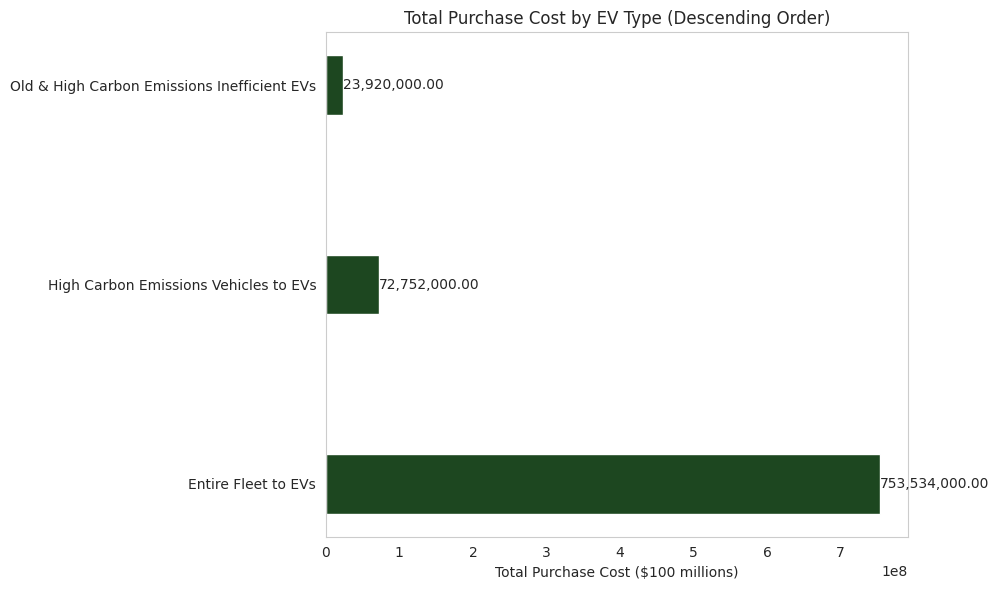

In [ ]:
import numpy as np

# Data
categories = ['Entire Fleet to EVs', 'High Carbon Emissions Vehicles to EVs', 'Old & High Carbon Emissions Inefficient EVs']
purchase_cost = [753534000.00, 72752000, 23920000]

# Sort data based on purchase cost
sorted_data = sorted(zip(purchase_cost, categories), reverse=True)
sorted_purchase_cost, sorted_categories = zip(*sorted_data)

# Plotting Purchase Cost
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_categories, sorted_purchase_cost, height=0.3, color='#1D4720', label='Total Purchase Cost')

# Add numerical values at the end of each bar
for bar, value in zip(bars, sorted_purchase_cost):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:,.2f}',
             va='center', ha='left', fontsize=10)

plt.xlabel('Total Purchase Cost ($100 millions)')
plt.title('Total Purchase Cost by EV Type (Descending Order)')
plt.grid(False)  # Remove grid lines
plt.tight_layout()
plt.show()


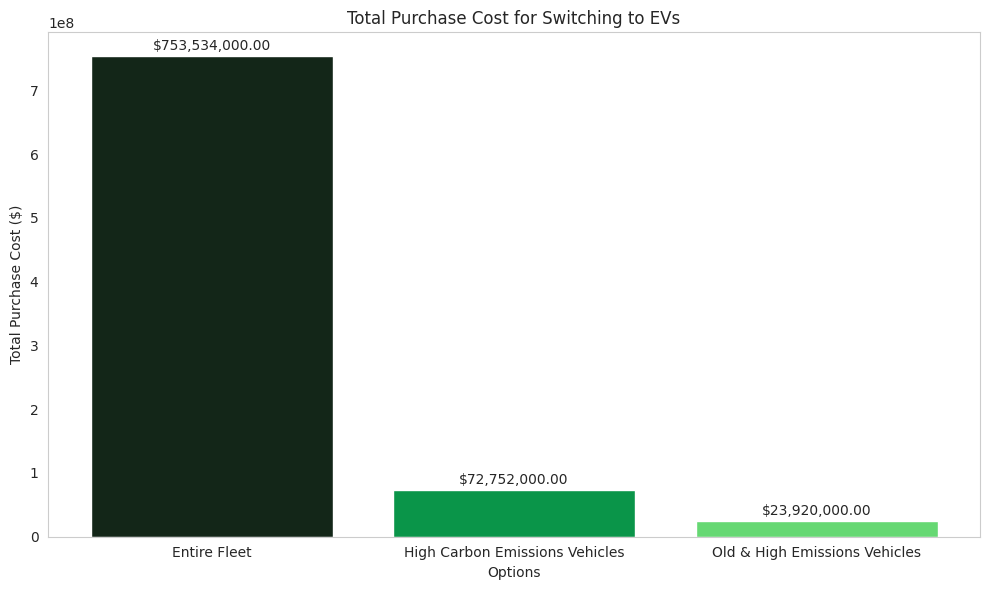

In [ ]:
import matplotlib.pyplot as plt

# Total costs
total_purchase_cost_entire_fleet = 753534000.00
total_purchase_cost_high_emissions_ev = 72752000.00
total_purchase_cost_old_high_emissions_ev = 23920000.00

# Categories
categories = ['Entire Fleet', 'High Carbon Emissions Vehicles', 'Old & High Emissions Vehicles']

# Total purchase costs
total_purchase_costs = [
    total_purchase_cost_entire_fleet,
    total_purchase_cost_high_emissions_ev,
    total_purchase_cost_old_high_emissions_ev
]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(categories, total_purchase_costs, color=['#132618', '#0A9549', '#66D873'])
plt.title('Total Purchase Cost for Switching to EVs')
plt.xlabel('Options')
plt.ylabel('Total Purchase Cost ($)')
plt.xticks(rotation=0)
plt.grid(False)  # Remove grid lines

# Adding the values on top of the bars
for i, value in enumerate(total_purchase_costs):
    plt.text(i, value + 10000000, f"${value:,.2f}", ha='center')

plt.tight_layout()
plt.show()


In [ ]:
# Sample data
categories = ['Entire Fleet', 'High Carbon Emissions Vehicles', 'Old & High Emissions Vehicles']
total_purchase_costs = [753534000.00, 72752000.00, 23920000.00]

# Create Plotly figure
fig = go.Figure(data=[go.Bar(x=categories, y=total_purchase_costs, marker_color=['#132618', '#0A9549', '#66D873'],
                             text=[f"${cost:,.2f}" for cost in total_purchase_costs],
                             textposition='outside')])

# Update figure layout
fig.update_layout(title='Total Purchase Cost for Switching to EVs',
                  xaxis_title='Fleet Replacement Options',
                  yaxis_title='Total Purchase Cost ($)',
                  plot_bgcolor='rgba(0, 0, 0, 0)',  # Set background color to transparent
                  )

# Create Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div(children=[
    html.H1(children='Total Purchase Cost for Switching to EVs'),
    dcc.Graph(id='purchase-cost-bar-chart', figure=fig)
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

# Infrastructure Cost for an EV fleet

In [ ]:
replacement_old_vehicles = {'Motorcycle': 2079}
replacement_old_vehicles

{'Motorcycle': 2079}

In [ ]:
# Short term
# Constants
charger_costs = {'22 kW DC': 8000, '60 kW DC': 100000, '120 kW DC': 220000} #($P)
charger_support_ratios = {'Motorcycle': 10, 'Van': 5, 'Truck': 2}
charging_power = {'Motorcycle': 22, 'Van': 60, 'Truck': 120}
public_charging_rate = {'22 kW DC': 0.3,'60 kW DC':0.3, '120 kW DC': 2.2}  # Assuming same rate for 60 kW and 120 kW for simplicity #($P/min)
total_chargers_needed = {'22 kW DC': 0, '60 kW DC': 0, '120 kW DC': 0}


# EV Energy Efficiencies (kWh/km)
EV_energy_efficiency = {
    'Motorcycle': 0.09,
    'Van': 0.26,
    'Truck': 1.5
}

for category, num_vehicles in replacement_old_vehicles.items():
    # Map the specific vehicle category to its general category for calculations
    general_category = category_map[category]

    # Determine charger type based on general category
    charger_type = '22 kW DC' if general_category == 'Motorcycle' else ('120 kW DC' if general_category == 'Truck' else '60 kW DC')

    # Calculate chargers needed using the general category
    chargers_needed = math.ceil(num_vehicles / charger_support_ratios[general_category])
    infrastructure_cost = chargers_needed * charger_costs[charger_type]

    # Calculate kWh needed and annual charging cost
    total_distance = total_average_distance[category]
    kWh_needed = total_distance * EV_energy_efficiency[general_category]
    charging_power_kw = charging_power[general_category]  # Use general_category to fetch charging power
    charging_hours = kWh_needed / charging_power_kw
    charging_minutes = charging_hours * 60
    annual_charging_cost = charging_minutes * public_charging_rate[charger_type]
    total_chargers_needed[charger_type] += chargers_needed

    print(f"Category: {category}")
    print(f"Number of Chargers needed: {chargers_needed}")
    print(f"  Infrastructure Cost: ${infrastructure_cost:,.2f}")
    print(f"  Annual Charging Cost: ${annual_charging_cost:,.2f}\n")


print("Total number of each type of charger needed:")
for charger_type, total_needed in total_chargers_needed.items():
    print(f"{charger_type}: {total_needed}")

Category: Motorcycle
Number of Chargers needed: 208
  Infrastructure Cost: $1,664,000.00
  Annual Charging Cost: $9,135,597.67

Total number of each type of charger needed:
22 kW DC: 208
60 kW DC: 0
120 kW DC: 0


In [ ]:
# Long term

total_chargers_needed = {'22 kW DC': 0, '60 kW DC': 0, '120 kW DC': 0}


for category, num_vehicles in older_vehicles_to_replace.items():
    # Map the specific vehicle category to its general category for calculations
    general_category = category_map[category]

    # Determine charger type based on general category
    charger_type = '22 kW DC' if general_category == 'Motorcycle' else ('120 kW DC' if general_category == 'Truck' else '60 kW DC')


    # Calculate chargers needed using the general category
    chargers_needed = math.ceil(num_vehicles / charger_support_ratios[general_category])
    infrastructure_cost = chargers_needed * charger_costs[charger_type]

    # Calculate kWh needed and annual charging cost
    total_distance = total_average_distance[category]
    kWh_needed = total_distance * EV_energy_efficiency[general_category]
    charging_power_kw = charging_power[general_category]  # Use general_category to fetch charging power
    charging_hours = kWh_needed / charging_power_kw
    charging_minutes = charging_hours * 60
    annual_charging_cost = charging_minutes * public_charging_rate[charger_type]
    total_chargers_needed[charger_type] += chargers_needed

    print(f"Category: {category}")
    print(f"Type of Charger needed: {charger_type}")
    print(f"Number of Chargers needed: {chargers_needed}")
    print(f"  Infrastructure Cost: ${infrastructure_cost:,.2f}")
    print(f"  Annual Charging Cost: ${annual_charging_cost:,.2f}\n")

print("Total number of each type of charger needed:")
for charger_type, total_needed in total_chargers_needed.items():
    print(f"{charger_type}: {total_needed}")


Category: Motorcycle
Type of Charger needed: 22 kW DC
Number of Chargers needed: 663
  Infrastructure Cost: $5,304,000.00
  Annual Charging Cost: $9,135,597.67

Category: Panel Van
Type of Charger needed: 60 kW DC
Number of Chargers needed: 494
  Infrastructure Cost: $49,400,000.00
  Annual Charging Cost: $3,885,915.85

Category: 3-tonne truck
Type of Charger needed: 120 kW DC
Number of Chargers needed: 166
  Infrastructure Cost: $36,520,000.00
  Annual Charging Cost: $24,338,164.95

Category: Window Van
Type of Charger needed: 60 kW DC
Number of Chargers needed: 10
  Infrastructure Cost: $1,000,000.00
  Annual Charging Cost: $132,569.39

Category: Patrol Vans
Type of Charger needed: 60 kW DC
Number of Chargers needed: 10
  Infrastructure Cost: $1,000,000.00
  Annual Charging Cost: $51,604.80

Category: 7-seater Van
Type of Charger needed: 60 kW DC
Number of Chargers needed: 14
  Infrastructure Cost: $1,400,000.00
  Annual Charging Cost: $55,261.01

Category: 8-tonne truck
Type of Char

In [ ]:
import math

total_infrastructure_cost = 0
total_annual_charging_cost = 0

for category, num_vehicles in older_vehicles_to_replace.items():
    # Map the specific vehicle category to its general category for calculations
    general_category = category_map[category]

    # Determine charger type based on general category
    charger_type = '22 kW DC' if general_category == 'Motorcycle' else ('120 kW DC' if general_category == 'Truck' else '60 kW DC')

    # Calculate chargers needed using the general category
    chargers_needed = math.ceil(num_vehicles / charger_support_ratios[general_category])
    infrastructure_cost = chargers_needed * charger_costs[charger_type]

    # Calculate kWh needed and annual charging cost
    total_distance = total_average_distance[category]
    kWh_needed = total_distance * EV_energy_efficiency[general_category]
    charging_power_kw = charging_power[general_category]  # Use general_category to fetch charging power
    charging_hours = kWh_needed / charging_power_kw
    charging_minutes = charging_hours * 60
    annual_charging_cost = charging_minutes * public_charging_rate[charger_type]

    # Accumulate total costs
    total_infrastructure_cost += infrastructure_cost
    total_annual_charging_cost += annual_charging_cost

    print(f"Category: {category}")
    print(f"Type of Charger needed: {charger_type}")
    print(f"Number of Chargers needed: {chargers_needed}")
    print(f"  Infrastructure Cost: ${infrastructure_cost:,.2f}")
    print(f"  Annual Charging Cost: ${annual_charging_cost:,.2f}\n")

print("Total Infrastructure Cost: ${:,.2f}".format(total_infrastructure_cost))
print("Total Annual Charging Cost: ${:,.2f}".format(total_annual_charging_cost))


Category: Motorcycle
Type of Charger needed: 22 kW DC
Number of Chargers needed: 663
  Infrastructure Cost: $5,304,000.00
  Annual Charging Cost: $9,135,597.67

Category: Panel Van
Type of Charger needed: 60 kW DC
Number of Chargers needed: 494
  Infrastructure Cost: $49,400,000.00
  Annual Charging Cost: $3,885,915.85

Category: 3-tonne truck
Type of Charger needed: 120 kW DC
Number of Chargers needed: 166
  Infrastructure Cost: $36,520,000.00
  Annual Charging Cost: $24,338,164.95

Category: Window Van
Type of Charger needed: 60 kW DC
Number of Chargers needed: 10
  Infrastructure Cost: $1,000,000.00
  Annual Charging Cost: $132,569.39

Category: Patrol Vans
Type of Charger needed: 60 kW DC
Number of Chargers needed: 10
  Infrastructure Cost: $1,000,000.00
  Annual Charging Cost: $51,604.80

Category: 7-seater Van
Type of Charger needed: 60 kW DC
Number of Chargers needed: 14
  Infrastructure Cost: $1,400,000.00
  Annual Charging Cost: $55,261.01

Category: 8-tonne truck
Type of Char

# 2(d) Cost of Fuel Card Management System: - Ian

## Cost Projection and Breakdown

### Cost of Telematics

In [ ]:
# Load the Fleet Log to see what kind of data it contains
fleet_data_path = '/content/drive/MyDrive/Solus Prime Accenture Case/Data Provided/Fleet Data.xlsx'
fleet_data = pd.read_excel(fleet_data_path)
fleet_data #this is a dataframe

,District,Category,Type,Business Unit,Vehicle Brand,Vehicle Model,Vehicle Manufactured Year
0,Heritage Highlands,Motorcycle,Motorcycle,Domestic Parcels,HONDA,C1004-MA,2008
1,Heritage Highlands,Motorcycle,Motorcycle,Domestic Parcels,HONDA,C1004-MA,2008
2,Heritage Highlands,Motorcycle,Motorcycle,Domestic Parcels,HONDA,C1004-MA,2008
3,Heritage Highlands,Motorcycle,Motorcycle,Domestic Parcels,HONDA,C1004-MA,2008
4,Heritage Highlands,Motorcycle,Motorcycle,Domestic Parcels,HONDA,C1004-MA,2008
...,...,...,...,...,...,...,...
10162,Spiky Bay,Motorcycle,Motorcycle,Domestic Parcels,GENOS,CT100FMB10,2013
10163,Spiky Bay,Motorcycle,Motorcycle,International Parcels,GENOS,CT100FMB10,2013
10164,Spiky Bay,Motorcycle,Motorcycle,Domestic Parcels,GENOS,CT100FMB10,2013
10165,Spiky Bay,Motorcycle,Motorcycle,Domestic Parcels,GENOS,CT100FMB10,2013


In [ ]:
# Looking at the current fleet
fleet_data

# From here find the cost of setting up telematics with existing fleet
setup_costs = {
    'Motorcycle': 200,
    'Panel Van': 300,
    'Patrol Vans': 300,
    'Window Van': 300,
    '7-seater Van': 300,
    '8-tonne truck': 500,
    'Pick-up truck': 500,
    '3-tonne truck': 500
}

# Map the purchase costs to the vehicles in the DataFrame
fleet_data['Setup Cost'] = fleet_data['Category'].map(setup_costs)

# Show the updated DataFrame with the 'Setup Cost' column
print(fleet_data.head())

             District    Category        Type     Business Unit Vehicle Brand  \
0  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
1  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
2  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
3  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   
4  Heritage Highlands  Motorcycle  Motorcycle  Domestic Parcels         HONDA   

  Vehicle Model  Vehicle Manufactured Year  Setup Cost  
0      C1004-MA                       2008         200  
1      C1004-MA                       2008         200  
2      C1004-MA                       2008         200  
3      C1004-MA                       2008         200  
4      C1004-MA                       2008         200  


In [ ]:
# # Load the Fleet Log to see what kind of data it contains
# fleet_log_path = '/content/drive/MyDrive/Accenture Case/Data Provided/Fleet Log.xlsx'
# fleet_log = pd.read_excel(fleet_log_path)
# fleet_log #this is a dataframe

In [ ]:
# Count the number of each vehicle type in the DataFrame
print(f"Total Number of Motorcycles: {fleet_data[fleet_data['Category'] == 'Motorcycle'].shape[0]}")
print(f"Total Number of Panel Vans: {fleet_data[fleet_data['Category'] == 'Panel Van'].shape[0]}")
print(f"Total Number of Patrol Vans: {fleet_data[fleet_data['Category'] == 'Patrol Vans'].shape[0]}")
print(f"Total Number of Window Vans: {fleet_data[fleet_data['Category'] == 'Window Van'].shape[0]}")
print(f"Total Number of 7-seater Vans: {fleet_data[fleet_data['Category'] == '7-seater Van'].shape[0]}")
print(f"Total Number of 8-tonne Trucks: {fleet_data[fleet_data['Category'] == '8-tonne truck'].shape[0]}")
print(f"Total Number of Pick-up Trucks: {fleet_data[fleet_data['Category'] == 'Pick-up truck'].shape[0]}")
print(f"Total Number of 3-tonne Trucks: {fleet_data[fleet_data['Category'] == '3-tonne truck'].shape[0]}\n")

# Show the total cost of setting up each vehicle type
print(f"Total Cost of Motorcycles: {fleet_data[fleet_data['Category'] == 'Motorcycle'].shape[0]*setup_costs['Motorcycle']:,}")
print(f"Total Cost of Panel Vans: {fleet_data[fleet_data['Category'] == 'Panel Van'].shape[0]*setup_costs['Panel Van']:,}")
print(f"Total Cost of Patrol Vans: {fleet_data[fleet_data['Category'] == 'Patrol Vans'].shape[0]*setup_costs['Patrol Vans']:,}")
print(f"Total Cost of Window Vans: {fleet_data[fleet_data['Category'] == 'Window Van'].shape[0]*setup_costs['Window Van']:,}")
print(f"Total Cost of 7-seater Vans: {fleet_data[fleet_data['Category'] == '7-seater Van'].shape[0]*setup_costs['7-seater Van']:,}")
print(f"Total Cost of 8-tonne Trucks: {fleet_data[fleet_data['Category'] == '8-tonne truck'].shape[0]*setup_costs['8-tonne truck']:,}")
print(f"Total Cost of Pick-up Trucks: {fleet_data[fleet_data['Category'] == 'Pick-up truck'].shape[0]*setup_costs['Pick-up truck']:,}")
print(f"Total Cost of 3-tonne Trucks: {fleet_data[fleet_data['Category'] == '3-tonne truck'].shape[0]*setup_costs['3-tonne truck']:,}")

Total Number of Motorcycles: 6628
Total Number of Panel Vans: 2466
Total Number of Patrol Vans: 49
Total Number of Window Vans: 48
Total Number of 7-seater Vans: 69
Total Number of 8-tonne Trucks: 24
Total Number of Pick-up Trucks: 552
Total Number of 3-tonne Trucks: 331

Total Cost of Motorcycles: 1,325,600
Total Cost of Panel Vans: 739,800
Total Cost of Patrol Vans: 14,700
Total Cost of Window Vans: 14,400
Total Cost of 7-seater Vans: 20,700
Total Cost of 8-tonne Trucks: 12,000
Total Cost of Pick-up Trucks: 276,000
Total Cost of 3-tonne Trucks: 165,500


In [ ]:
# Show the Total Cost of Setting up Telematics
total_setup_cost = fleet_data['Setup Cost'].sum()
current_number_of_vehicles = fleet_data.shape[0]
print("\nTotal Cost of Setting up Telematics:")
print(f"Total Telematics Setup Cost: ${total_setup_cost:,.2f}")
print(f"Number of Vehicles to be set up: {current_number_of_vehicles}")


Total Cost of Setting up Telematics:
Total Telematics Setup Cost: $2,568,700.00
Number of Vehicles to be set up: 10167


### Cost of Fuel Card Monitoring System

In [ ]:
fcms_issuance_cost = 25 * 10167
fcms_development_cost = 500000
fcms_training_cost = 2*2000
fcms_maintenance_cost = fcms_development_cost * 0.1

fcms_initial_cost = fcms_issuance_cost + fcms_development_cost + fcms_training_cost + fcms_maintenance_cost
fcms_recurring_cost = fcms_training_cost + fcms_maintenance_cost

print(f"Initial Cost: {fcms_initial_cost}")
print(f"Recurring Cost: {fcms_recurring_cost}")


Initial Cost: 808175.0
Recurring Cost: 54000.0


### Cost Savings of FMS

In [ ]:
telematics_ICE_fuel_savings = { #15% fuel savings for ICE
    'Motorcycle': 0.85,
    'Panel Van': 0.85,
    'Patrol Vans': 0.85,
    'Window Van': 0.85,
    '7-seater Van': 0.85,
    '8-tonne Truck': 0.85,
    'Pick-up truck': 0.85,
    '3-tonne Truck': 0.85
}

telematics_EV_fuel_savings = { #20% fuel savings for ICE
    'Motorcycle': 0.8,
    'Panel Van': 0.8,
    'Patrol Vans': 0.8,
    'Window Van': 0.8,
    '7-seater Van': 0.8,
    '8-tonne Truck': 0.8,
    'Pick-up truck': 0.8,
    '3-tonne Truck': 0.8
}

fuel_price = {
    'Petrol': 2.05,
    'Diesel': 2.15
}

In [ ]:
# Create another dataframe
avg_cost = fleet_log_filtered[['Category','Fuel Type', 'Average Liters', 'Average Fuel Amount']].copy()

# Calculate the new litre amount after implementing telematics on existing fleet
avg_cost['Current Cost'] = avg_cost.apply(lambda row: row['Average Liters'] * fuel_price.get(row['Fuel Type'], 1), axis=1)
avg_cost['Telematics ICE Average Liters'] = avg_cost['Average Liters'] * 0.85
avg_cost['Telematics Cost'] = avg_cost.apply(lambda row: row['Telematics ICE Average Liters'] * fuel_price.get(row['Fuel Type'], 1), axis=1)

avg_cost['Telematics Cost Savings'] = avg_cost['Current Cost'] - avg_cost['Telematics Cost']

avg_cost

,Category,Fuel Type,Average Liters,Average Fuel Amount,Current Cost,Telematics ICE Average Liters,Telematics Cost,Telematics Cost Savings
0,Panel Van,Petrol,3.785854e+06,7310505.480,7.761000e+06,3.217976e+06,6.596850e+06,1.164150e+06
1,3-tonne Truck,Diesel,2.549843e+06,5205269.640,5.482163e+06,2.167367e+06,4.659839e+06,8.223245e+05
2,Motorcycle,Petrol,1.318926e+06,2426476.215,2.703798e+06,1.121087e+06,2.298228e+06,4.055696e+05
3,Pick-up truck,Petrol,5.902862e+05,1135408.495,1.210087e+06,5.017433e+05,1.028574e+06,1.815130e+05
4,Window Van,Petrol,1.040820e+05,205141.910,2.133680e+05,8.846966e+04,1.813628e+05,3.200520e+04
5,7-seater Van,Petrol,6.661267e+04,124797.030,1.365560e+05,5.662077e+04,1.160726e+05,2.048340e+04
6,Patrol Vans,Petrol,4.887666e+04,97500.805,1.001972e+05,4.154516e+04,8.516759e+04,1.502957e+04
7,8-tonne Truck,Diesel,9.952725e+03,19123.560,2.139836e+04,8.459816e+03,1.818861e+04,3.209754e+03


In [ ]:
total_cost_savings = avg_cost["Telematics Cost Savings"].sum()
total_cost_savings

fms_initial_cost = fcms_initial_cost + total_setup_cost
fms_recurring_cost = fcms_recurring_cost

print(f"FMS initial cost: {fms_initial_cost}")
print(f"FMS recurring cost: {fms_recurring_cost}")

FMS initial cost: 3376875.0
FMS recurring cost: 54000.0


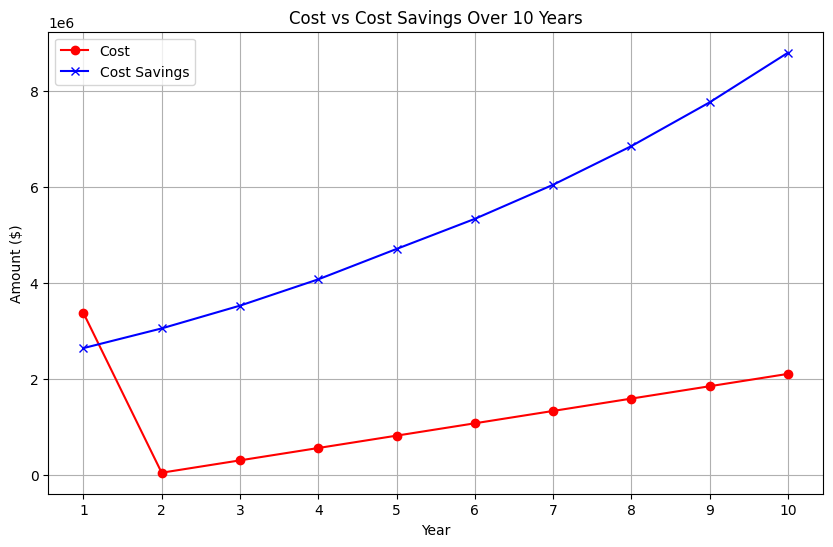

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fms_initial_cost = fcms_initial_cost + total_setup_cost
fms_recurring_cost = fcms_recurring_cost

# Initialize arrays to store cost and cost savings values for each year
years = np.arange(1, 11)  # 1 through 10
costs = np.zeros(10)
savings = np.zeros(10)

# Set initial values
costs[0] = fms_initial_cost
savings[0] = total_cost_savings

# Calculate costs and savings for each year
for i in range(1, 10):
    if i > 1:  # From the second year onwards, increase recurring cost by 0.1 * total_setup_cost each year
        fms_recurring_cost += 0.1 * total_setup_cost
    costs[i] = fms_recurring_cost  # Recurring cost for subsequent years

    # Apply the initial increase rule and then further increase savings by multiplying by 1.1 each year
    if i < 5:
        savings[i] = savings[i-1] * 1.05
    else:
        savings[i] = savings[i-1] * 1.03
    savings[i] *= 1.1  # Further increase savings by 1.1 each year for fleet expansion

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, costs, label='Cost', marker='o', color='red')  # Change cost color to red
plt.plot(years, savings, label='Cost Savings', marker='x', color='blue')  # Change savings color to blue
plt.title('Cost vs Cost Savings Over 10 Years')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Initialize arrays to store cost and cost savings values for each year
years = np.arange(1, 11)  # 1 through 10
costs = np.zeros(10)
savings = np.zeros(10)

# Set initial values
costs[0] = fms_initial_cost
savings[0] = total_cost_savings

# Recalculate fms_recurring_cost for each year inside the loop
for i in range(1, 10):
    if i > 1:  # Increase recurring cost by 0.1 * total_setup_cost each year after the first year
      fms_recurring_cost += 0.1 * total_setup_cost
    costs[i] = fms_recurring_cost

    # Increase savings
    if i < 5:
        savings[i] = savings[i-1] * 1.05
    else:
        savings[i] = savings[i-1] * 1.03
    savings[i] *= 1.1  # Further increase by 1.1 each year

cumulative_costs = np.cumsum(costs)
cumulative_savings = np.cumsum(savings)

# Find the payback period
payback_period = None
for i in range(10):
    if cumulative_savings[i] >= cumulative_costs[i]:
        # For a more precise decimal payback period, interpolate between this year and the previous year
        if i == 0:
            payback_period = 1
        else:
            savings_needed = cumulative_costs[i] - cumulative_savings[i-1]
            yearly_savings = savings[i]
            fractional_year = savings_needed / yearly_savings
            payback_period = i + fractional_year
        break

if payback_period is not None:
    print(f"The payback period is approximately {payback_period:.2f} years.")
else:
    print("The payback period is beyond 10 years.")


The payback period is approximately 1.93 years.


### Analysis of the relationship between quantity of vehicle type and adherence to fuel efficiency.

Hypothesis: With more vehicles of a particular type in a fleet, that vehicle type is more likely to deviate further than the supposed fuel efficiecy, as drivers feel less compelled to follow fuel-efficient practices being part of a large crowd.

In [ ]:
# Categorical data analysis - Category
fleet_data_path = '/content/drive/My Drive/Solus Prime_Accenture Code/Data Provided/Fleet Data.xlsx'
fleet_data = pd.read_excel(fleet_data_path)
category_count = fleet_data['Category'].value_counts()
category_count

In [ ]:
fleet_log_path = '/content/drive/My Drive/Solus Prime_Accenture Code/Data Provided/Fleet Log.xlsx'
fleet_log = pd.read_excel(fleet_log_path)
# fleet_log.head() #this is a dataframe

In [ ]:
import pandas as pd

# Assuming df is your DataFrame with energy efficiency calculations
data = fleet_log.copy()  # Assuming fleet_log is your original data
data = data.iloc[:-1]

df = pd.DataFrame(data)

# Calculating energy efficiency for 2020 and 2021
df['Energy Efficiency 2020'] = df['Travel Distance2020'] / df['Liter2020']
df['Energy Efficiency 2021'] = df['Travel Distance2021'] / df['Liter2021']

# Creating a new DataFrame with relevant columns
energy_efficiency_df = df[['Category', 'Fuel Type', 'Energy Efficiency 2020', 'Energy Efficiency 2021']]

# Calculating the absolute percentage change in energy efficiency from 2020 to 2021
energy_efficiency_df['Absolute % Change in Efficiency'] = abs(
    (energy_efficiency_df['Energy Efficiency 2021'] - energy_efficiency_df['Energy Efficiency 2020']) /
    energy_efficiency_df['Energy Efficiency 2020']
) * 100

# energy_efficiency_df

# Sorting the DataFrame in ascending order of absolute % change in efficiency
energy_efficiency_df_sorted = energy_efficiency_df.sort_values(by='Absolute % Change in Efficiency', ascending=False)
energy_efficiency_df_sorted

Absolute % change in Efficiency here is used as a proxy for how consistent drivers are with fuel-efficient practices.

Looking at the results, Panel Van with one of the most vehicles in the fleet, had one of the lowest absolute % change in efficiency.
On the other hand, Window Van, with one of the least vehicles in the fleet, had one of the highest absolute % change.

Both these observations disprove the hypothesis proposed.

## Establishing the Dynamic Fuel Limit

There are several factors that affects fuel economy, such as weather conditions

Our team has identified several factors that affects fuel economy, such as weather conditions, and traffic jams. We will focus on the impact of weather on fuel economy, as data is more readily available.

Using thorough data analysis, our team aims to account for these factors to be fair and accurate in our dynamic fuel limit estimation.

### Factor: Weather Patterns

Among other factors, weather conditions affect fuel consumptions of vehicles. Lower temperature on rainy days lower temperature, which increases the density of the ambient air. Colder air results in increased aerodynamic resistance, which requires more power (i.e Fuel) to compensate (Shell, 2023).

https://www.shell.com.au/motorists/go-well-content-hub/how-winter-weather-affects-your-fuel-economy.html

#### Visualising the weather patterns in Singapore

First, we visualise the weather patterns in Singapore, using data obtained via data.gov.sg.

In [ ]:
import numpy as np

sg_weather_path = '/content/drive/MyDrive/Accenture Case/External Datasets/HistoricalDailyWeatherRecords.xlsx'
sg_weather = pd.read_excel(sg_weather_path)

# Reformat the dataframe to correct the header
new_header = sg_weather.iloc[0]
sg_weather = sg_weather[1:]
sg_weather.columns = new_header

# Drop unused columns in the dataframe
sg_weather = sg_weather.drop(["station", "daily_rainfall_total", "mean_wind_speed", "max_wind_speed"], axis=1)

# Convert na and 0 to NaN
columns_to_modify = ["highest_30_min_rainfall", "highest_60_min_rainfall", "highest_120_min_rainfall", "mean_temperature",]
sg_weather[columns_to_modify] = sg_weather[columns_to_modify].replace("na", np.nan)
sg_weather[columns_to_modify] = sg_weather[columns_to_modify].replace(0, np.nan)

# Drop rows where mean_temp, max_temp, min_temp are empty
sg_weather = sg_weather.dropna(subset=['mean_temperature', 'maximum_temperature', 'minimum_temperature'])

sg_weather['date'] = pd.to_datetime(sg_weather['date'], format='%Y-%m-%d')

# Reset index
sg_weather.reset_index(drop=True, inplace=True)

In [ ]:
# sg_weather.head()

In [ ]:
# Split dataset into sunny and rainy datasets
condition = sg_weather["highest_30_min_rainfall"].isna() & sg_weather["highest_60_min_rainfall"].isna() & sg_weather["highest_120_min_rainfall"].isna()
sg_sunny_weather = sg_weather[condition]
sg_rainy_weather = sg_weather[~condition]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot sunny weather
# Extract year from 'date'
sg_sunny_weather['year'] = sg_sunny_weather['date'].dt.year
sg_rainy_weather['year'] = sg_rainy_weather['date'].dt.year

# Aggregate the data by year and calculate the mean for temperatures
sunny_yearly_temps = sg_sunny_weather.groupby('year').agg({
    'mean_temperature': 'mean',
    'maximum_temperature': 'mean',
    'minimum_temperature': 'mean'
}).reset_index()

rainy_yearly_temps = sg_rainy_weather.groupby('year').agg({
    'mean_temperature': 'mean',
    'maximum_temperature': 'mean',
    'minimum_temperature': 'mean'
}).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(yearly_temps['year'], yearly_temps['mean_temperature'], label='Mean Temperature', marker='o')
# ax.plot(yearly_temps['year'], yearly_temps['maximum_temperature'], label='Maximum Temperature', marker='o')
ax.plot(rainy_yearly_temps['year'], rainy_yearly_temps['minimum_temperature'], label='Rainy Minimum Temperature', marker='o')
ax.plot(sunny_yearly_temps['year'], sunny_yearly_temps['maximum_temperature'], label='Sunny Maximum Temperature', marker='o')

# Limit date range due to limited data
ax.set_xlim([2014, 2017])

ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Average Temperatures per Year')
ax.legend()

# Adjusting X axis to show only integer years
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# Assuming sunny_yearly_temps and rainy_yearly_temps are already defined as per your previous steps

# Merge the sunny and rainy DataFrames on 'year'
yearly_temps_merged = pd.merge(sunny_yearly_temps, rainy_yearly_temps, on='year', suffixes=('_sunny', '_rainy'))

# Calculate the difference: Sunny Max Temp - Rainy Min Temp
yearly_temps_merged['temp_difference'] = yearly_temps_merged['maximum_temperature_sunny'] - yearly_temps_merged['minimum_temperature_rainy']

# Plotting the difference
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(yearly_temps_merged['year'], yearly_temps_merged['temp_difference'], label='Difference (Sunny Max - Rainy Min)', marker='o', color='blue')

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Temperature Difference (°C)')
ax.set_title('Yearly Temperature Difference (Sunny Max - Rainy Min)')
ax.legend()

# Setting the X axis to only show integer years
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

We have chosen to use the maximum temperature on Sunny days, and minimum temperature on Rainy days, to account for the most extreme conditions to provide drivers/riders as much allowance as possible.

Looking at the graph, we notice that difference in Sunny Maximum temperature and Rainy Minimum Temperature has been increasing gradually over the years.

This indicates the need for us to obtain updated data for 2024 and beyond, or perform forecasting techniques.

The metric can be further improved by refining it on a monthly instead of a yearly level. This accounts for variations in temperature ranges throughout the years, given by seasonality factors.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Extract month from 'date'
sg_sunny_weather['month'] = sg_sunny_weather['date'].dt.month
sg_rainy_weather['month'] = sg_rainy_weather['date'].dt.month

# Step 2: Aggregate by month for both datasets
sunny_monthly_avg_max_temp = sg_sunny_weather.groupby('month')['maximum_temperature'].mean().reset_index()
rainy_monthly_avg_min_temp = sg_rainy_weather.groupby('month')['minimum_temperature'].mean().reset_index()

# Step 3: Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(sunny_monthly_avg_max_temp['month'], sunny_monthly_avg_max_temp['maximum_temperature'], label='Sunny Avg Max Temp', marker='o')
ax.plot(rainy_monthly_avg_min_temp['month'], rainy_monthly_avg_min_temp['minimum_temperature'], label='Rainy Avg Min Temp', marker='o')

# Formatting the plot
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Average Monthly Temperatures')
ax.set_xticks(range(1, 13))  # Ensure all months are shown
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have sunny_monthly_avg_max_temp and rainy_monthly_avg_min_temp from the previous step

# Calculate the difference between the sunny max temp and rainy min temp for each month
# Ensure both DataFrames are sorted by month to align the months correctly
sunny_monthly_avg_max_temp.sort_values('month', inplace=True)
rainy_monthly_avg_min_temp.sort_values('month', inplace=True)

# Calculate the difference
temperature_difference = sunny_monthly_avg_max_temp['maximum_temperature'].values - rainy_monthly_avg_min_temp['minimum_temperature'].values

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(sunny_monthly_avg_max_temp['month'], temperature_difference, label='Difference (Sunny Max - Rainy Min)', marker='o', color='red')

# Formatting the plot
ax.set_xlabel('Month')
ax.set_ylabel('Temperature Difference (°C)')
ax.set_title('Monthly Temperature Difference Between Sunny Max and Rainy Min')
ax.set_xticks(range(1, 13))  # Ensure all months are shown
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax.legend()

plt.show()

From the graph, we can see that certain months (Feb - Oct) have higher temperature ranges than others (Jan, Dec).

Thus, in our approach, we will provide different allowances for fuel consumption, depending on the month.

#### Calculating Allowance for Weather Patterns

To calculate the allowance for weather patterns, we will use the month with the lowest difference as the baseline. After which, we will calculate the allowance as a proportion (%) relative to the baseline.

Based on a study done by energy.gov, cold weather can significantly reduce fuel economy.

For a drop of 31.67 celsius, Fuel economy can drop by up to:
- 20% for ICE
- 40% for Hybrids
- 40% for EVs

In [ ]:
import pandas as pd

# Constants
total_drop_celsius = 31.67
decreases = {
    'ICE': 20,
    'Hybrid': 40,
    'EV': 40
}

# Calculate the decrease per Celsius
decrease_per_celsius = {vehicle: decrease / total_drop_celsius for vehicle, decrease in decreases.items()}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(decrease_per_celsius.items()), columns=['Vehicle Type', 'Decrease in Fuel Economy per Celsius %'])
df['Decrease in Fuel Economy per Celsius %'] = df['Decrease in Fuel Economy per Celsius %'].round(2)

# Display the DataFrame
df

In [ ]:
temperature_difference

In [ ]:
import numpy as np
import pandas as pd

# Placeholder array for temperature differences, as used in the previous example
temperature_difference = np.array([5, 7, 10, 15, 20, 25, 30, 27, 22, 17, 9, 4])

# Month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Vehicle information
vehicle_info = {
    'ICE': 0.63,
    'Hybrid/EV': 1.26,
}

# Initialize an empty list for the data
data = []

# Loop through each month and each vehicle type
for i, temp_diff in enumerate(temperature_difference):
    month = month_names[i]
    for vehicle_type, decrease in vehicle_info.items():
        # Calculate the allowance for each month and each vehicle type
        allowance = temp_diff * decrease
        data.append({
            'Month': month,
            'Difference': temp_diff,
            'Vehicle Type': vehicle_type,
            'Decrease in Fuel Economy Per Celsius': decrease,
            'Allowance': allowance
        })

# Convert the list of dictionaries into a DataFrame
df_allowances = pd.DataFrame(data)

# Display the DataFrame
df_allowances


In [ ]:
import matplotlib.pyplot as plt

# Filter data for ICE and Hybrid/EV
df_ICE = df_allowances[df_allowances['Vehicle Type'] == 'ICE']
df_Hybrid_EV = df_allowances[df_allowances['Vehicle Type'] == 'Hybrid/EV']

# Plotting
plt.figure(figsize=(12, 6))

# Line graph for ICE Vehicles
plt.plot(df_ICE['Month'], df_ICE['Allowance'], label='ICE', marker='o', linestyle='-', color='blue')

# Line graph for Hybrid/EV Vehicles
plt.plot(df_Hybrid_EV['Month'], df_Hybrid_EV['Allowance'], label='Hybrid/EV', marker='o', linestyle='-', color='green')

plt.title('Allowance for ICE vs Hybrid/EV Vehicles by Month')
plt.xlabel('Month')
plt.ylabel('Allowance % of baseline fuel limit')
plt.legend()
plt.xticks(rotation=45)  # Rotate month names for better readability
plt.grid(True)
plt.show()


### Calculating the baseline fuel limit

The baseline fuel limit can be determined by calculating the shortest distance required to visit all delivery locations and return to the start point.

To calculate the shortest distance, we will first determine the optimal route for drivers to take.

Based on the assumption that drivers use Google Maps to navigate from one location to another, we will use Google Maps to get distance information between locations.

Gauging the fuel limit based on distance required also ensures that drivers/riders will not be unfairly penalised for delivering more goods across longer routes.

#### Scenario: Delivery from NTU to other universities (NUS, SMU, SUTD) before returning to NTU.

In [ ]:
!pip install googlemaps

In [ ]:
# os.environ['API_KEY'] = 'XXX'

In [ ]:
import os
import googlemaps
from itertools import permutations

def get_distance(gmaps, origin, destination):
    """Retrieve distance between origin and destination using Google Maps Distance Matrix API."""
    distance_result = gmaps.distance_matrix(origins=[origin], destinations=[destination], mode="driving")
    distance = distance_result['rows'][0]['elements'][0]['distance']['value']  # Distance in meters
    return distance

def calculate_delivery_routes(gmaps, delivery_locations, start_location):
    """Calculate and sort delivery route permutations by total distance."""
    results = []
    for perm in permutations(delivery_locations):
        route = [start_location] + list(perm) + [start_location]
        total_distance = sum(get_distance(gmaps, route[i], route[i+1]) for i in range(len(route)-1))
        results.append([total_distance, route])
    sorted_results = sorted(results, key=lambda x: x[0])
    return sorted_results


# Your Google Maps API Key
api_key = os.getenv('API_KEY')
gmaps = googlemaps.Client(key=api_key)

# Example delivery locations and start location
delivery_locations = [
    (1.296568, 103.852),  # SMU
    (1.2966, 103.7764),  # NUS
    (1.3413, 103.9638)  # SUTD
]
start_location = (1.3483, 103.6831)  # Los Angeles, back to start

# Calculate delivery routes
routes = calculate_delivery_routes(gmaps, delivery_locations, start_location)

# Print sorted routes by distance
for route in routes:
    print(f"Distance: {route[0]} meters, Route: {route[1]}")

#### Scenarios: Visualisation comparing distances of different routes

In [ ]:
import matplotlib.pyplot as plt

# Assuming routes is your list of routes and distances
routes = [
    [83677, [(1.3483, 103.6831), (1.2966, 103.7764), (1.296568, 103.852), (1.3413, 103.9638), (1.3483, 103.6831)]],
    [86426, [(1.3483, 103.6831), (1.3413, 103.9638), (1.296568, 103.852), (1.2966, 103.7764), (1.3483, 103.6831)]],
    [88025, [(1.3483, 103.6831), (1.296568, 103.852), (1.3413, 103.9638), (1.2966, 103.7764), (1.3483, 103.6831)]],
    [89275, [(1.3483, 103.6831), (1.2966, 103.7764), (1.3413, 103.9638), (1.296568, 103.852), (1.3483, 103.6831)]],
    [102993, [(1.3483, 103.6831), (1.3413, 103.9638), (1.2966, 103.7764), (1.296568, 103.852), (1.3483, 103.6831)]],
    [104302, [(1.3483, 103.6831), (1.296568, 103.852), (1.2966, 103.7764), (1.3413, 103.9638), (1.3483, 103.6831)]]
]

# Extract distances and route indices for labeling
distances = [route[0] for route in routes]
route_indices = [f"Route {i+1}" for i in range(len(routes))]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(route_indices, distances, color='skyblue')

plt.xlabel('Route')
plt.ylabel('Distance')
plt.title('Comparison of Route Distances')
plt.xticks(rotation=45)  # Rotate route labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()

In [ ]:
import pandas as pd

# Reusing data from the previous code
routes = [
    [83677, [(1.3483, 103.6831), (1.2966, 103.7764), (1.296568, 103.852), (1.3413, 103.9638), (1.3483, 103.6831)]],
    [86426, [(1.3483, 103.6831), (1.3413, 103.9638), (1.296568, 103.852), (1.2966, 103.7764), (1.3483, 103.6831)]],
    [88025, [(1.3483, 103.6831), (1.296568, 103.852), (1.3413, 103.9638), (1.2966, 103.7764), (1.3483, 103.6831)]],
    [89275, [(1.3483, 103.6831), (1.2966, 103.7764), (1.3413, 103.9638), (1.296568, 103.852), (1.3483, 103.6831)]],
    [102993, [(1.3483, 103.6831), (1.3413, 103.9638), (1.2966, 103.7764), (1.296568, 103.852), (1.3483, 103.6831)]],
    [104302, [(1.3483, 103.6831), (1.296568, 103.852), (1.2966, 103.7764), (1.3413, 103.9638), (1.3483, 103.6831)]]
]

# Extracting distances
distances = [route[0] for route in routes]

# Calculating the shortest distance and percentage differences
min_distance = min(distances)
percentage_diff = [round((distance - min_distance) / min_distance * 100, 2) for distance in distances]

# Creating the DataFrame
df = pd.DataFrame({
    'Route': [f'Route {i+1}' for i in range(len(routes))],
    'Distance Travelled': distances,
    '% Difference from Shortest Route': percentage_diff
})

# Display the DataFrame
df


From the code, we notice that depending on the route chosen by driver/riders, distance can be lengthened by a wide range of between 3% or 24%.

Correspondingly, this will directly impact quantity of fuel consumed.

#### Scenario: Visualisation comparing carbon emissions for different routes travelled for different vehicle types.

In our scenario, we will assume that EV Vans and/or Trucks will be travelling at the routes mentioned.

Truck Efficiency and Carbon Intensity is derived from the assumptions provided.

Carbon Emissions is calculated using the following formula:

Carbon Emissions = Distance Travlled in Kilometres * Truck Efficiency in kWh/km * Carbon Intensity in kg CO2/kWh.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the dataframe
df = pd.DataFrame({
    'Route': ['Route 1', 'Route 2', 'Route 3', 'Route 4', 'Route 5', 'Route 6'],
    'Distance Travelled': [83677, 86426, 88025, 89275, 102993, 104302]  # in meters
})

# Truck efficiency in kWh/km
truck_efficiency_kWh_km = 1.5

# Carbon intensity of electricity in kg CO2/kWh
carbon_intensity_kgCO2_kWh = 0.55


# Calculate carbon emissions for each route
df['Carbon Emissions'] = ((df['Distance Travelled'] / 1000) * truck_efficiency_kWh_km * carbon_intensity_kgCO2_kWh)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Route'], df['Carbon Emissions'], color='teal')
plt.xlabel('Route')
plt.ylabel('Carbon Emissions (t CO2)')
plt.title('Carbon Emissions for Each Route by a EV Truck')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the dataframe
df = pd.DataFrame({
    'Route': ['Route 1', 'Route 2', 'Route 3', 'Route 4', 'Route 5', 'Route 6'],
    'Distance Travelled': [83677, 86426, 88025, 89275, 102993, 104302]  # in meters
})

# Motorcycle efficiency in kWh/km
van_efficiency_kWh_km = 0.26

# Carbon intensity of electricity in kg CO2/kWh
carbon_intensity_kgCO2_kWh = 0.55

# Calculate carbon emissions for each route
df['Carbon Emissions'] = ((df['Distance Travelled'] / 1000) * van_efficiency_kWh_km * carbon_intensity_kgCO2_kWh)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Route'], df['Carbon Emissions'], color='orange')
plt.xlabel('Route')
plt.ylabel('Carbon Emissions (t CO2)')
plt.title('Carbon Emissions for Each Route by an EV Van')
plt.xticks(rotation=45)
plt.show()

With potentially unnecessarily large additional carbon emissions due to choosing suboptimal routes, there is a need to use optimal distances to determine the fuel limit.

By setting the fuel limit based on the average of the top 3 routes, we will allow the driver to have leeway in choosing their route, yet avoid releasing carbon emissions by choosing suboptimal routes.

#### Scenario: Calculated fuel limit

First, we will determine the distance travelled for the delivery by taking the average distance of the top 3 routes.

Next, The fuel limit is calculated by multiplying the required energy in kWh, with the Electricity Tariff ($/kWh).

In [ ]:
# Distance Travelled
dist_arr = [83677, 86426, 88025, 89275, 102993, 104302]
avg_target_dist = sum(dist_arr[:3])/3

# Fuel Limit
electric_tariff = 0.40

fuel_limit = round(electric_tariff*(avg_target_dist/1000), 2)

print(f"Fuel Limit for the scenario: ${fuel_limit}")

#### Scenario: Final Calculation considering the other factors (Traffic Jam, Weather)

In [ ]:
import math
import requests
import datetime
from datetime import datetime

today = datetime.datetime.today()
params = {"date": today.strftime("%Y-%m-%d")} # YYYY-MM-DD

def calculate_distance(lat1, lon1, lat2, lon2):
    """Calculate the Haversine distance between two points on the earth."""
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371  # Radius of Earth in kilometers. Use 3956 for miles
    return c * r

def find_closest_areas(lat_lng_list, area_metadata):
    """Find the closest area for each latitude and longitude in the list."""
    closest_areas = []
    for lat, lng in lat_lng_list:
        closest_distance = float('inf')
        closest_area_name = None
        for area in area_metadata:
            area_lat = area['label_location']['latitude']
            area_lng = area['label_location']['longitude']
            distance = calculate_distance(lat, lng, area_lat, area_lng)
            if distance < closest_distance:
                closest_distance = distance
                closest_area_name = area['name']
        closest_areas.append(closest_area_name)
    return closest_areas

# Example usage
delivery_locations = [
    (1.296568, 103.852),  # SMU
    (1.2966, 103.7764),  # NUS
    (1.3413, 103.9638)  # SUTD
]

result = requests.get('https://api.data.gov.sg/v1/environment/2-hour-weather-forecast', params=params).json()
area_metadata = result["area_metadata"]

closest_areas = find_closest_areas(delivery_locations, area_metadata)
# print("Closest areas for the given coordinates are:", closest_areas)

data = result["items"]

# Step 1: Convert timestamps to datetime objects and find the latest timestamp
timestamps = [datetime.fromisoformat(entry['timestamp'].rstrip('Z')) for entry in data]
latest_timestamp = max(timestamps)

# Step 2: Filter entries with the latest timestamp
latest_entries = [entry for entry in data if datetime.fromisoformat(entry['timestamp'].rstrip('Z')) == latest_timestamp]

# print(latest_entries)


def get_forecasts_for_closest_areas(closest_areas, latest_entries):
    # Assuming latest_entries is a list with a single entry containing the latest forecasts
    forecasts_list = latest_entries[0]['forecasts']
    forecasts_dict = {}
    for area_name in closest_areas:
        # Find the forecast for the current area by matching the area name
        forecast_entry = next((entry for entry in forecasts_list if entry['area'] == area_name), None)
        if forecast_entry:
            # Add the forecast to the dictionary
            forecasts_dict[area_name] = forecast_entry['forecast']
    return forecasts_dict

# Example usage
forecast_dict = get_forecasts_for_closest_areas(closest_areas, latest_entries)
print(forecast_dict)

Since the weather forecast for the area of the coordinates indicate no rain, we do not apply the additional rain allowance

In [ ]:
cur_allowance_condition = (df_allowances["Month"] == "Mar") & (df_allowances["Vehicle Type"] == "Hybrid/EV")
cur_allowance = df_allowances[cur_allowance_condition]["Allowance"]

# cur_allowance

print(f"Current Allowance for Rain is: {cur_allowance.iloc[0]}%")
print(f"Current Forecast: {forecast_dict}")
print()
print(f"Fuel Limit if raining: ${fuel_limit*(1+cur_allowance.iloc[0])}")
print(f"Fuel Limit if not raining: ${fuel_limit}")
print("Locations are not raining, allowance not applied.")
print()
print(f"Final Fuel Limit: ${fuel_limit}")